# Scraping

In [9]:
# Example1 CSV
!pip install spotipy

!pip install numpy

!pip install pandas


import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
#Put Your App’s Client ID and Secret Below
client_id = "76e68a20696a499fa3723c8240133314"
client_secret = "af5961c310fb4d3ba1b6b04237831742"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

#You can put multiple artists below
name = ['Illenium']
result = sp.search(name)
result['tracks']['items'][1]['artists']

# Extract Artist's uri
artists_uris = result['tracks']['items'][0]['artists'][0]['uri']
# Pull all of the artist's albums
artist_albums = sp.artist_albums(artists_uris, album_type='album')
# Store artist's albums' names' and uris in separate lists
artist_album_names = []
artist_album_uris = []
for i in range(len(artist_albums['items'])):
    artist_album_names.append(artist_albums['items'][i]['name'])
    artist_album_uris.append(artist_albums['items'][i]['uri'])

#print(artist_album_names)
#print(artist_album_uris)

# Keep names and uris in same order to keep track of duplicate albums

#Extract all the songs from every album

def album_songs(uri):
    album = uri
    spotify_albums[album] = {}
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = []
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    #pull data on album tracks
    tracks = sp.album_tracks(album)

    for n in range(len(tracks['items'])):
        spotify_albums[album]['album'].append(artist_album_names[album_count])
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

spotify_albums = {}
album_count = 0
for i in artist_album_uris: #each album
    album_songs(i)
    #print(str(artist_album_names[album_count]) + " album songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

#Extract audio features for each song
def audio_features(album):
    # Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []

    track_count = 0
    # Loop through each track URI for the given album
    for track in spotify_albums[album]['uri']:
     try:
        # pull audio features per track
        features = sp.audio_features(track)
        # Check if features were fetched successfully
        if features and features[0]:
         # Append to relevant key-value
         spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
         spotify_albums[album]['danceability'].append(features[0]['danceability'])
         spotify_albums[album]['energy'].append(features[0]['energy'])
         spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
         spotify_albums[album]['liveness'].append(features[0]['liveness'])
         spotify_albums[album]['loudness'].append(features[0]['loudness'])
         spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
         spotify_albums[album]['tempo'].append(features[0]['tempo'])
         spotify_albums[album]['valence'].append(features[0]['valence'])
         # popularity is stored elsewhere
         pop = sp.track(track)
         spotify_albums[album]['popularity'].append(pop['popularity'])
        else:
         # If features could not be fetched, append None to all feature lists
         print(f"No features found for track {track}")
         for feature in ['acousticness', 'danceability', 'energy', 'instrumentalness',
                        'liveness', 'loudness', 'speechiness', 'tempo', 'valence']:
            spotify_albums[album][feature].append(None)
            # Append None for missing popularity
            spotify_albums[album]['popularity'].append(None)
     except Exception as e:
        # Log any exceptions that occur
        print(f"An error occurred for track {track}: {e}")

        track_count += 1
#Now let loop through albums extracting the audio features.For this we will add a random delay every few albums to avoid sending too many requests at Spotify's API.

import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

#add the above spotify music data to a new dataframe
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums:
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])

print(len(dic_df['album']))

import pandas as pd
dataframe = pd.DataFrame.from_dict(dic_df)

#Spotify has a duplicate issue which can be addressed by removing all but the most popular songs.
print(len(dataframe))
final_df = dataframe.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print(len(final_df))

final_df.to_csv("Illenium.csv",index=True, index_label="Index")
print("done")


5 playlists completed
Loop #: 5
Elapsed Time: 26.21503186225891 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 45.35084629058838 seconds
207
207
192
done


In [10]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
#Put Your App’s Client ID and Secret Below
client_id = "76e68a20696a499fa3723c8240133314"
client_secret = "af5961c310fb4d3ba1b6b04237831742"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

#You can put multiple artists below
name = ['Seven Lions']
result = sp.search(name)
result['tracks']['items'][1]['artists']

# Extract Artist's uri
artists_uris = result['tracks']['items'][0]['artists'][0]['uri']
# Pull all of the artist's albums
artist_albums = sp.artist_albums(artists_uris, album_type='album')
# Store artist's albums' names' and uris in separate lists
artist_album_names = []
artist_album_uris = []
for i in range(len(artist_albums['items'])):
    artist_album_names.append(artist_albums['items'][i]['name'])
    artist_album_uris.append(artist_albums['items'][i]['uri'])

#print(artist_album_names)
#print(artist_album_uris)

# Keep names and uris in same order to keep track of duplicate albums

#Extract all the songs from every album

def album_songs(uri):
    album = uri
    spotify_albums[album] = {}
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = []
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    #pull data on album tracks
    tracks = sp.album_tracks(album)

    for n in range(len(tracks['items'])):
        spotify_albums[album]['album'].append(artist_album_names[album_count])
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

spotify_albums = {}
album_count = 0
for i in artist_album_uris: #each album
    album_songs(i)
    #print(str(artist_album_names[album_count]) + " album songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

#Extract audio features for each song
def audio_features(album):
    # Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []

    track_count = 0
    # Loop through each track URI for the given album
    for track in spotify_albums[album]['uri']:
     try:
        # pull audio features per track
        features = sp.audio_features(track)
        # Check if features were fetched successfully
        if features and features[0]:
         # Append to relevant key-value
         spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
         spotify_albums[album]['danceability'].append(features[0]['danceability'])
         spotify_albums[album]['energy'].append(features[0]['energy'])
         spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
         spotify_albums[album]['liveness'].append(features[0]['liveness'])
         spotify_albums[album]['loudness'].append(features[0]['loudness'])
         spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
         spotify_albums[album]['tempo'].append(features[0]['tempo'])
         spotify_albums[album]['valence'].append(features[0]['valence'])
         # popularity is stored elsewhere
         pop = sp.track(track)
         spotify_albums[album]['popularity'].append(pop['popularity'])
        else:
         # If features could not be fetched, append None to all feature lists
         print(f"No features found for track {track}")
         for feature in ['acousticness', 'danceability', 'energy', 'instrumentalness',
                        'liveness', 'loudness', 'speechiness', 'tempo', 'valence']:
            spotify_albums[album][feature].append(None)
            # Append None for missing popularity
            spotify_albums[album]['popularity'].append(None)
     except Exception as e:
        # Log any exceptions that occur
        print(f"An error occurred for track {track}: {e}")

        track_count += 1
#Now let loop through albums extracting the audio features.For this we will add a random delay every few albums to avoid sending too many requests at Spotify's API.

import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

#add the above spotify music data to a new dataframe
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums:
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])

print(len(dic_df['album']))

import pandas as pd
dataframe = pd.DataFrame.from_dict(dic_df)

#Spotify has a duplicate issue which can be addressed by removing all but the most popular songs.
print(len(dataframe))
final_df = dataframe.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print(len(final_df))

final_df.to_csv("Lions.csv",index=True, index_label="Index")
print("done")


5 playlists completed
Loop #: 5
Elapsed Time: 13.851406335830688 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 25.26906394958496 seconds
103
103
90
done


In [6]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
#Put Your App’s Client ID and Secret Below
client_id = "76e68a20696a499fa3723c8240133314"
client_secret = "af5961c310fb4d3ba1b6b04237831742"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

#You can put multiple artists below
name = ['gryffin']
result = sp.search(name)
result['tracks']['items'][1]['artists']

# Extract Artist's uri
artists_uris = result['tracks']['items'][0]['artists'][0]['uri']
# Pull all of the artist's albums
artist_albums = sp.artist_albums(artists_uris, album_type='album')
# Store artist's albums' names' and uris in separate lists
artist_album_names = []
artist_album_uris = []
for i in range(len(artist_albums['items'])):
    artist_album_names.append(artist_albums['items'][i]['name'])
    artist_album_uris.append(artist_albums['items'][i]['uri'])

#print(artist_album_names)
#print(artist_album_uris)

# Keep names and uris in same order to keep track of duplicate albums

#Extract all the songs from every album

def album_songs(uri):
    album = uri
    spotify_albums[album] = {}
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = []
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    #pull data on album tracks
    tracks = sp.album_tracks(album)

    for n in range(len(tracks['items'])):
        spotify_albums[album]['album'].append(artist_album_names[album_count])
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

spotify_albums = {}
album_count = 0
for i in artist_album_uris: #each album
    album_songs(i)
    #print(str(artist_album_names[album_count]) + " album songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

#Extract audio features for each song
def audio_features(album):
    # Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []

    track_count = 0
    # Loop through each track URI for the given album
    for track in spotify_albums[album]['uri']:
     try:
        # pull audio features per track
        features = sp.audio_features(track)
        # Check if features were fetched successfully
        if features and features[0]:
         # Append to relevant key-value
         spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
         spotify_albums[album]['danceability'].append(features[0]['danceability'])
         spotify_albums[album]['energy'].append(features[0]['energy'])
         spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
         spotify_albums[album]['liveness'].append(features[0]['liveness'])
         spotify_albums[album]['loudness'].append(features[0]['loudness'])
         spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
         spotify_albums[album]['tempo'].append(features[0]['tempo'])
         spotify_albums[album]['valence'].append(features[0]['valence'])
         # popularity is stored elsewhere
         pop = sp.track(track)
         spotify_albums[album]['popularity'].append(pop['popularity'])
        else:
         # If features could not be fetched, append None to all feature lists
         print(f"No features found for track {track}")
         for feature in ['acousticness', 'danceability', 'energy', 'instrumentalness',
                        'liveness', 'loudness', 'speechiness', 'tempo', 'valence']:
            spotify_albums[album][feature].append(None)
            # Append None for missing popularity
            spotify_albums[album]['popularity'].append(None)
     except Exception as e:
        # Log any exceptions that occur
        print(f"An error occurred for track {track}: {e}")

        track_count += 1
#Now let loop through albums extracting the audio features.For this we will add a random delay every few albums to avoid sending too many requests at Spotify's API.

import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

#add the above spotify music data to a new dataframe
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums:
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])

print(len(dic_df['album']))

import pandas as pd
dataframe = pd.DataFrame.from_dict(dic_df)

#Spotify has a duplicate issue which can be addressed by removing all but the most popular songs.
print(len(dataframe))
final_df = dataframe.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print(len(final_df))

final_df.to_csv("gryffin.csv",index=True, index_label="Index")
print("done")


70
70
53
done


In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0",
    "Accept-Encoding": "*",
    "Connection": "keep-alive"
}

#Put Your App’s Client ID and Secret Below
client_id = "76e68a20696a499fa3723c8240133314"
client_secret = "af5961c310fb4d3ba1b6b04237831742"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

#You can put multiple artists below
name = ['dabin']
result = sp.search(name)
result['tracks']['items'][1]['artists']

# Extract Artist's uri
artists_uris = result['tracks']['items'][0]['artists'][0]['uri']
# Pull all of the artist's albums
artist_albums = sp.artist_albums(artists_uris, album_type='album')
# Store artist's albums' names' and uris in separate lists
artist_album_names = []
artist_album_uris = []
for i in range(len(artist_albums['items'])):
    artist_album_names.append(artist_albums['items'][i]['name'])
    artist_album_uris.append(artist_albums['items'][i]['uri'])

#print(artist_album_names)
#print(artist_album_uris)

# Keep names and uris in same order to keep track of duplicate albums

#Extract all the songs from every album

def album_songs(uri):
    album = uri
    spotify_albums[album] = {}
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = []
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    #pull data on album tracks
    tracks = sp.album_tracks(album)

    for n in range(len(tracks['items'])):
        spotify_albums[album]['album'].append(artist_album_names[album_count])
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

spotify_albums = {}
album_count = 0
for i in artist_album_uris: #each album
    album_songs(i)
    #print(str(artist_album_names[album_count]) + " album songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

#Extract audio features for each song
def audio_features(album):
    # Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []

    track_count = 0
    # Loop through each track URI for the given album
    for track in spotify_albums[album]['uri']:
     try:
        # pull audio features per track
        features = sp.audio_features(track)
        # Check if features were fetched successfully
        if features and features[0]:
         # Append to relevant key-value
         spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
         spotify_albums[album]['danceability'].append(features[0]['danceability'])
         spotify_albums[album]['energy'].append(features[0]['energy'])
         spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
         spotify_albums[album]['liveness'].append(features[0]['liveness'])
         spotify_albums[album]['loudness'].append(features[0]['loudness'])
         spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
         spotify_albums[album]['tempo'].append(features[0]['tempo'])
         spotify_albums[album]['valence'].append(features[0]['valence'])
         # popularity is stored elsewhere
         pop = sp.track(track)
         spotify_albums[album]['popularity'].append(pop['popularity'])
        else:
         # If features could not be fetched, append None to all feature lists
         print(f"No features found for track {track}")
         for feature in ['acousticness', 'danceability', 'energy', 'instrumentalness',
                        'liveness', 'loudness', 'speechiness', 'tempo', 'valence']:
            spotify_albums[album][feature].append(None)
            # Append None for missing popularity
            spotify_albums[album]['popularity'].append(None)
     except Exception as e:
        # Log any exceptions that occur
        print(f"An error occurred for track {track}: {e}")

        track_count += 1
#Now let loop through albums extracting the audio features.For this we will add a random delay every few albums to avoid sending too many requests at Spotify's API.

import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

#add the above spotify music data to a new dataframe
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums:
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])

print(len(dic_df['album']))

import pandas as pd
dataframe = pd.DataFrame.from_dict(dic_df)

#Spotify has a duplicate issue which can be addressed by removing all but the most popular songs.
print(len(dataframe))
final_df = dataframe.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print(len(final_df))

final_df.to_csv("Dabin.csv",index=True, index_label="Index")
print("done")


5 playlists completed
Loop #: 5
Elapsed Time: 14.03250765800476 seconds
81
81
80
done


In [5]:
# Example1 CSV

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
#Put Your App’s Client ID and Secret Below
client_id = "76e68a20696a499fa3723c8240133314"
client_secret = "af5961c310fb4d3ba1b6b04237831742"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

#You can put multiple artists below
name = ['sabai']
result = sp.search(name)
result['tracks']['items'][1]['artists']

# Extract Artist's uri
artists_uris = result['tracks']['items'][0]['artists'][0]['uri']
# Pull all of the artist's albums
artist_albums = sp.artist_albums(artists_uris, album_type='album')
# Store artist's albums' names' and uris in separate lists
artist_album_names = []
artist_album_uris = []
for i in range(len(artist_albums['items'])):
    artist_album_names.append(artist_albums['items'][i]['name'])
    artist_album_uris.append(artist_albums['items'][i]['uri'])

#print(artist_album_names)
#print(artist_album_uris)

# Keep names and uris in same order to keep track of duplicate albums

#Extract all the songs from every album

def album_songs(uri):
    album = uri
    spotify_albums[album] = {}
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = []
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    #pull data on album tracks
    tracks = sp.album_tracks(album)

    for n in range(len(tracks['items'])):
        spotify_albums[album]['album'].append(artist_album_names[album_count])
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

spotify_albums = {}
album_count = 0
for i in artist_album_uris: #each album
    album_songs(i)
    #print(str(artist_album_names[album_count]) + " album songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

#Extract audio features for each song
def audio_features(album):
    # Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []

    track_count = 0
    # Loop through each track URI for the given album
    for track in spotify_albums[album]['uri']:
     try:
        # pull audio features per track
        features = sp.audio_features(track)
        # Check if features were fetched successfully
        if features and features[0]:
         # Append to relevant key-value
         spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
         spotify_albums[album]['danceability'].append(features[0]['danceability'])
         spotify_albums[album]['energy'].append(features[0]['energy'])
         spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
         spotify_albums[album]['liveness'].append(features[0]['liveness'])
         spotify_albums[album]['loudness'].append(features[0]['loudness'])
         spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
         spotify_albums[album]['tempo'].append(features[0]['tempo'])
         spotify_albums[album]['valence'].append(features[0]['valence'])
         # popularity is stored elsewhere
         pop = sp.track(track)
         spotify_albums[album]['popularity'].append(pop['popularity'])
        else:
         # If features could not be fetched, append None to all feature lists
         print(f"No features found for track {track}")
         for feature in ['acousticness', 'danceability', 'energy', 'instrumentalness',
                        'liveness', 'loudness', 'speechiness', 'tempo', 'valence']:
            spotify_albums[album][feature].append(None)
            # Append None for missing popularity
            spotify_albums[album]['popularity'].append(None)
     except Exception as e:
        # Log any exceptions that occur
        print(f"An error occurred for track {track}: {e}")

        track_count += 1
#Now let loop through albums extracting the audio features.For this we will add a random delay every few albums to avoid sending too many requests at Spotify's API.

import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

#add the above spotify music data to a new dataframe
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums:
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])

print(len(dic_df['album']))

import pandas as pd
dataframe = pd.DataFrame.from_dict(dic_df)

#Spotify has a duplicate issue which can be addressed by removing all but the most popular songs.
print(len(dataframe))
final_df = dataframe.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print(len(final_df))

final_df.to_csv("Sabai.csv",index=True, index_label="Index")
print("done")


14
14
14
done


In [17]:
# Example 3: This example makes a loop to retrieve cover photos of multiple artists specified by the user.

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas
#Put Your App’s Client ID and Secret Below
client_id = "76e68a20696a499fa3723c8240133314"
client_secret = "af5961c310fb4d3ba1b6b04237831742"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# I am creating an empty dictionary here
output = {"AlbumName": [], "CoverPhoto": [], "Artist": []}

names = ['Illenium','Seven Lions']  # Spotify capped, will split into parts 
for name in names:
    result = sp.search(name)
    result['tracks']['items'][1]['artists']
    # Extract Artist's uri
    artists_uris = result['tracks']['items'][0]['artists'][0]['uri']
    # Pull all of the artist's albums
    artist_albums = sp.artist_albums(artists_uris, album_type='album')
    for i in range(len(artist_albums['items'])):
       output['AlbumName'].append(artist_albums['items'][i]['name'])
       #print(artist_albums['items'][i]['images'][0]['url'])
       output['CoverPhoto'].append(artist_albums['items'][i]['images'][0]['url'])
       #Get artist names
       #print(artist_albums['items'][i]['artists'][0]['name'])
       output['Artist'].append(artist_albums['items'][i]['artists'][0]['name'])

#Save results to a csv file
results = pandas.DataFrame(output)
results.to_csv('covers1.csv', index=True, index_label="Index",encoding="utf-8-sig")

print("done")


done


In [18]:
# Create code to download images from csv 

!pip install requests

import pandas as pd
import requests
import os

# Load the CSV file
csv_file = 'C:\\Users\\Brian\\Desktop\\10.2\\covers.csv'  
df = pd.read_csv(csv_file)

# Specify the column that contains the image URLs
url_column = 'CoverPhoto'  

# Create a directory to save images
output_dir = 'downloaded_images'
os.makedirs(output_dir, exist_ok=True)

# Iterate over the URLs and save images
for index, row in df.iterrows():
    image_url = row[url_column]
    try:
        response = requests.get(image_url)
        if response.status_code == 200:  # Check if the request was successful
            # Construct the file path
            image_name = os.path.join(output_dir, f'image_{index + 1}.jpg')  # Adjust extension as needed
            with open(image_name, 'wb') as img_file:
                img_file.write(response.content)
            print(f'Saved: {image_name}')
        else:
            print(f'Failed to retrieve image from {image_url}, Status Code: {response.status_code}')
    except Exception as e:
        print(f'Error occurred while processing {image_url}: {e}')



Saved: downloaded_images\image_1.jpg
Saved: downloaded_images\image_2.jpg
Saved: downloaded_images\image_3.jpg
Saved: downloaded_images\image_4.jpg
Saved: downloaded_images\image_5.jpg
Saved: downloaded_images\image_6.jpg
Saved: downloaded_images\image_7.jpg
Saved: downloaded_images\image_8.jpg
Saved: downloaded_images\image_9.jpg
Saved: downloaded_images\image_10.jpg
Saved: downloaded_images\image_11.jpg
Saved: downloaded_images\image_12.jpg
Saved: downloaded_images\image_13.jpg
Saved: downloaded_images\image_14.jpg
Saved: downloaded_images\image_15.jpg
Saved: downloaded_images\image_16.jpg
Saved: downloaded_images\image_17.jpg
Saved: downloaded_images\image_18.jpg
Saved: downloaded_images\image_19.jpg
Saved: downloaded_images\image_20.jpg
Saved: downloaded_images\image_21.jpg
Saved: downloaded_images\image_22.jpg
Saved: downloaded_images\image_23.jpg
Saved: downloaded_images\image_24.jpg
Saved: downloaded_images\image_25.jpg
Saved: downloaded_images\image_26.jpg
Saved: downloaded_ima

In [11]:
import pandas as pd
import requests
import os

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas
#Put Your App’s Client ID and Secret Below
client_id = "76e68a20696a499fa3723c8240133314"
client_secret = "af5961c310fb4d3ba1b6b04237831742"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# I am creating an empty dictionary here
output = {"AlbumName": [], "CoverPhoto": [], "Artist": []}

names = ['gryffin','dabin']
for name in names:
    result = sp.search(name)
    result['tracks']['items'][1]['artists']
    # Extract Artist's uri
    artists_uris = result['tracks']['items'][0]['artists'][0]['uri']
    # Pull all of the artist's albums
    artist_albums = sp.artist_albums(artists_uris, album_type='album')
    for i in range(len(artist_albums['items'])):
       output['AlbumName'].append(artist_albums['items'][i]['name'])
       #print(artist_albums['items'][i]['images'][0]['url'])
       output['CoverPhoto'].append(artist_albums['items'][i]['images'][0]['url'])
       #Get artist names
       #print(artist_albums['items'][i]['artists'][0]['name'])
       output['Artist'].append(artist_albums['items'][i]['artists'][0]['name'])

#Save results to a csv file
results = pandas.DataFrame(output)
results.to_csv('covers2.csv', index=True, index_label="Index",encoding="utf-8-sig")

print("done")

# Create code to download images from csv 


# Load the CSV file
csv_file = 'C:\\Users\\Brian\\Desktop\\10.2\\covers2.csv'  
df = pd.read_csv(csv_file)

# Specify the column that contains the image URLs
url_column = 'CoverPhoto'  

# Create a directory to save images
output_dir = 'downloaded_images'
os.makedirs(output_dir, exist_ok=True)

# Iterate over the URLs and save images
for index, row in df.iterrows():
    image_url = row[url_column]
    try:
        response = requests.get(image_url)
        if response.status_code == 200:  # Check if the request was successful
            # Construct the file path
            image_name = os.path.join(output_dir, f'image_{index + 1}.jpg')  # Adjust extension as needed
            with open(image_name, 'wb') as img_file:
                img_file.write(response.content)
            print(f'Saved: {image_name}')
        else:
            print(f'Failed to retrieve image from {image_url}, Status Code: {response.status_code}')
    except Exception as e:
        print(f'Error occurred while processing {image_url}: {e}')


done
Saved: downloaded_images\image_1.jpg
Saved: downloaded_images\image_2.jpg
Saved: downloaded_images\image_3.jpg
Saved: downloaded_images\image_4.jpg
Saved: downloaded_images\image_5.jpg
Saved: downloaded_images\image_6.jpg
Saved: downloaded_images\image_7.jpg
Saved: downloaded_images\image_8.jpg
Saved: downloaded_images\image_9.jpg
Saved: downloaded_images\image_10.jpg
Saved: downloaded_images\image_11.jpg


In [10]:
# Example 3: This example makes a loop to retrieve cover photos of multiple artists specified by the user.

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas
#Put Your App’s Client ID and Secret Below
client_id = "76e68a20696a499fa3723c8240133314"
client_secret = "af5961c310fb4d3ba1b6b04237831742"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# I am creating an empty dictionary here
output = {"AlbumName": [], "CoverPhoto": [], "Artist": []}

names = ['Sabai']
for name in names:
    result = sp.search(name)
    result['tracks']['items'][1]['artists']
    # Extract Artist's uri
    artists_uris = result['tracks']['items'][0]['artists'][0]['uri']
    # Pull all of the artist's albums
    artist_albums = sp.artist_albums(artists_uris, album_type='album')
    for i in range(len(artist_albums['items'])):
       output['AlbumName'].append(artist_albums['items'][i]['name'])
       #print(artist_albums['items'][i]['images'][0]['url'])
       output['CoverPhoto'].append(artist_albums['items'][i]['images'][0]['url'])
       #Get artist names
       #print(artist_albums['items'][i]['artists'][0]['name'])
       output['Artist'].append(artist_albums['items'][i]['artists'][0]['name'])

#Save results to a csv file
results = pandas.DataFrame(output)
results.to_csv('covers3.csv', index=True, index_label="Index",encoding="utf-8-sig")

print("done")


# Create code to download images from csv 


# Load the CSV file
csv_file = 'C:\\Users\\Brian\\Desktop\\10.2\\covers3.csv'  
df = pd.read_csv(csv_file)

# Specify the column that contains the image URLs
url_column = 'CoverPhoto'  

# Create a directory to save images
output_dir = 'downloaded_images'
os.makedirs(output_dir, exist_ok=True)

# Iterate over the URLs and save images
for index, row in df.iterrows():
    image_url = row[url_column]
    try:
        response = requests.get(image_url)
        if response.status_code == 200:  # Check if the request was successful
            # Construct the file path
            image_name = os.path.join(output_dir, f'image_{index + 1}.jpg')  # Adjust extension as needed
            with open(image_name, 'wb') as img_file:
                img_file.write(response.content)
            print(f'Saved: {image_name}')
        else:
            print(f'Failed to retrieve image from {image_url}, Status Code: {response.status_code}')
    except Exception as e:
        print(f'Error occurred while processing {image_url}: {e}')




done
Saved: downloaded_images\image_1.jpg


# Data Cleaning

In [12]:
# Combining datasets

# Load the CSV file
csv_file = 'C:\\Users\\Brian\\Desktop\\10.2\\Sabai.csv'  
sabai_df = pd.read_csv(csv_file)

csv_file = 'C:\\Users\\Brian\\Desktop\\10.2\\gryffin.csv'  
gryffin_df = pd.read_csv(csv_file)

csv_file = 'C:\\Users\\Brian\\Desktop\\10.2\\Dabin.csv'  
dabin_df = pd.read_csv(csv_file)

csv_file = 'C:\\Users\\Brian\\Desktop\\10.2\\Lions.csv'  
seven_df = pd.read_csv(csv_file)

csv_file = 'C:\\Users\\Brian\\Desktop\\10.2\\Illenium.csv'  
illenium_df = pd.read_csv(csv_file)


In [17]:
print('Sabai')
print(sabai_df.shape)
print(sabai_df.columns)


print('Gryffin')
print(gryffin_df.shape)
print(gryffin_df.columns)

print('Dabin')
print(dabin_df.shape)
print(dabin_df.columns)

print('Seven Lions')
print(seven_df.shape)
print(seven_df.columns)

print('Illenium')
print(illenium_df.shape)
print(illenium_df.columns)

Sabai
(14, 17)
Index(['Index', 'artist', 'album', 'track_number', 'id', 'name', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'popularity'],
      dtype='object')
Gryffin
(53, 17)
Index(['Index', 'artist', 'album', 'track_number', 'id', 'name', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'popularity'],
      dtype='object')
Dabin
(80, 17)
Index(['Index', 'artist', 'album', 'track_number', 'id', 'name', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'popularity'],
      dtype='object')
Seven Lions
(90, 17)
Index(['Index', 'artist', 'album', 'track_number', 'id', 'name', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speech

In [23]:
songs_df = pd.concat([sabai_df, gryffin_df, dabin_df,seven_df,illenium_df], axis=0)
print(songs_df.shape)

songs_df= songs_df.drop_duplicates() # Removes any concatenated header rows
songs_df = songs_df.drop('Index', axis=1) # Deletes unnecessary index 
songs_df.to_csv('songs.csv', index=False)


(429, 17)


# Unigram by Artists

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(('intro',), 1), (('harder',), 1), (('breathe',), 1)]
[(('intro', 'harder'), 1), (('harder', 'breathe'), 1), (('breathe', 'heart'), 1)]
[(('intro', 'harder', 'breathe'), 1), (('harder', 'breathe', 'heart'), 1), (('breathe', 'heart', "n't"), 1)]


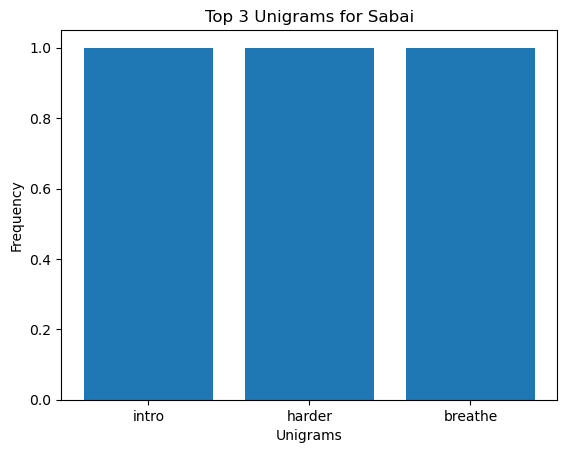

In [25]:
# Example 4

!pip install matplotlib

import pandas
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import ssl


#I am creating a dictionary here titled inputdata
inputdata={}
#I am assigning the content of the csv file to my dictionary
#header is my row in the csv file that is why header is 0 below
inputdata = pandas.read_csv('Sabai.csv', header=[0], index_col=0).to_dict()

#We can use type to check the data type of a variable
#print(type(inputdata))

#I am using the column headers from the csv file to find the data I am interested to analyze

# I created a new dictionary here for the description column in my csv file
descriptiondictionary = inputdata.get('name')
#print(type(descriptiondictionary))

# I am converting the dictionary to a list so I can analyze the data
descriptionlist =  list(descriptiondictionary.values())
#print(type(descriptionlist))

#convert list to string
#I need the data in string format for analysis purposes
descriptioninstring = ''
for eachletter in  descriptionlist:
    descriptioninstring += ' '+ str(eachletter)

#print(descriptioninstring)

#Make the string lower case
lowercasedescriptions=descriptioninstring.lower()
#print(lowercasedescriptions)

#remove the url from text to prevent a future error
lowercasedescriptions= re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', lowercasedescriptions)
#print(lowercasedescriptions)

#remove anything that does not make sense to you from the string
lowercasedescriptions = lowercasedescriptions.replace(".", "")
lowercasedescriptions = lowercasedescriptions.replace("#", "")
lowercasedescriptions = lowercasedescriptions.replace(",", "")
lowercasedescriptions = lowercasedescriptions.replace("''", "")
lowercasedescriptions = lowercasedescriptions.replace('""', "")
lowercasedescriptions = lowercasedescriptions.replace('"', "")


#remove the stop or common words from the string
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('stopwords')
#print(stopwords.words('english'))

description_tokens = word_tokenize(lowercasedescriptions)

description_tokens_without_stopwords = [word for word in description_tokens if not word in stopwords.words()]

#print(description_tokens_without_stopwords )

unigrams = ngrams(description_tokens_without_stopwords, 1)
bigrams = ngrams(description_tokens_without_stopwords,2)
trigrams = ngrams(description_tokens_without_stopwords,3)

#print (Counter(unigrams))
#print (Counter(bigrams))
#print (Counter(trigrams))

mostcommonunigrams = Counter(unigrams)
#This will print top 3 unigrams
print(mostcommonunigrams.most_common(3))
#print(type(mostcommonunigrams))

mostcommonbigrams = Counter(bigrams)
print(mostcommonbigrams.most_common(3))

mostcommontrigrams = Counter(trigrams)
print(mostcommontrigrams.most_common(3))


#Draw a histogram of top 3 unigrams
top3unigrams = mostcommonunigrams.most_common(3)
top3unigrams_keys = []
top3unigrams_values = []
import re
for i in range(len(top3unigrams)):
    #print(top3unigrams[i][0][0])
    top3unigrams_keys.append(top3unigrams[i][0][0])
    top3unigrams_values.append(top3unigrams[i][1])

#print(top3unigrams_keys)
#print(top3unigrams_values)

import matplotlib.pyplot as plt

plt.bar(top3unigrams_keys, top3unigrams_values)
plt.title("Top 3 Unigrams for Sabai")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(('feat',), 21), (('calle',), 4), (('lehmann',), 4)]
[(('calle', 'lehmann'), 4), (('orchestral', 'version'), 4), (('feat', 'calle'), 3)]
[(('feat', 'calle', 'lehmann'), 3), (('magic', 'feat', 'babyidontlikeyou'), 1), (('feat', 'babyidontlikeyou', 'enemies'), 1)]


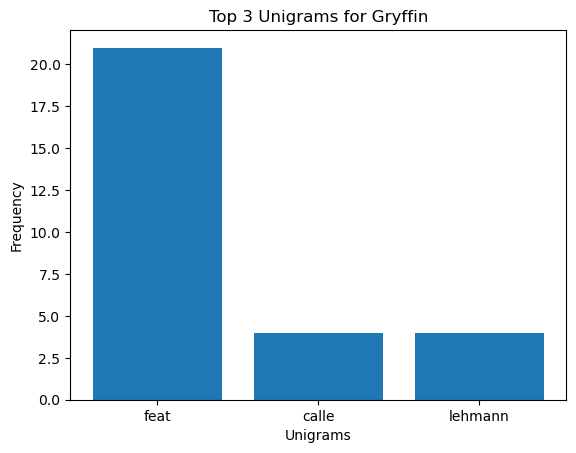

In [28]:
# Example 4

#I am creating a dictionary here titled inputdata
inputdata={}
#I am assigning the content of the csv file to my dictionary
#header is my row in the csv file that is why header is 0 below
inputdata = pandas.read_csv('gryffin.csv', header=[0], index_col=0).to_dict()

#We can use type to check the data type of a variable
#print(type(inputdata))

#I am using the column headers from the csv file to find the data I am interested to analyze

# I created a new dictionary here for the description column in my csv file
descriptiondictionary = inputdata.get('name')
#print(type(descriptiondictionary))

# I am converting the dictionary to a list so I can analyze the data
descriptionlist =  list(descriptiondictionary.values())
#print(type(descriptionlist))

#convert list to string
#I need the data in string format for analysis purposes
descriptioninstring = ''
for eachletter in  descriptionlist:
    descriptioninstring += ' '+ str(eachletter)

#print(descriptioninstring)

#Make the string lower case
lowercasedescriptions=descriptioninstring.lower()
#print(lowercasedescriptions)

#remove the url from text to prevent a future error
lowercasedescriptions= re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', lowercasedescriptions)
#print(lowercasedescriptions)

#remove anything that does not make sense to you from the string
lowercasedescriptions = lowercasedescriptions.replace(".", "")
lowercasedescriptions = lowercasedescriptions.replace("#", "")
lowercasedescriptions = lowercasedescriptions.replace(",", "")
lowercasedescriptions = lowercasedescriptions.replace("''", "")
lowercasedescriptions = lowercasedescriptions.replace('""', "")
lowercasedescriptions = lowercasedescriptions.replace('"', "")
lowercasedescriptions = lowercasedescriptions.replace('(', "")
lowercasedescriptions = lowercasedescriptions.replace(')', "")
lowercasedescriptions = lowercasedescriptions.replace('-', "")

#remove the stop or common words from the string
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('stopwords')
#print(stopwords.words('english'))

description_tokens = word_tokenize(lowercasedescriptions)

description_tokens_without_stopwords = [word for word in description_tokens if not word in stopwords.words()]

#print(description_tokens_without_stopwords )

unigrams = ngrams(description_tokens_without_stopwords, 1)
bigrams = ngrams(description_tokens_without_stopwords,2)
trigrams = ngrams(description_tokens_without_stopwords,3)

#print (Counter(unigrams))
#print (Counter(bigrams))
#print (Counter(trigrams))

mostcommonunigrams = Counter(unigrams)
#This will print top 3 unigrams
print(mostcommonunigrams.most_common(3))
#print(type(mostcommonunigrams))

mostcommonbigrams = Counter(bigrams)
print(mostcommonbigrams.most_common(3))

mostcommontrigrams = Counter(trigrams)
print(mostcommontrigrams.most_common(3))


#Draw a histogram of top 3 unigrams
top3unigrams = mostcommonunigrams.most_common(3)
top3unigrams_keys = []
top3unigrams_values = []
import re
for i in range(len(top3unigrams)):
    #print(top3unigrams[i][0][0])
    top3unigrams_keys.append(top3unigrams[i][0][0])
    top3unigrams_values.append(top3unigrams[i][1])

#print(top3unigrams_keys)
#print(top3unigrams_values)

import matplotlib.pyplot as plt

plt.bar(top3unigrams_keys, top3unigrams_values)
plt.title("Top 3 Unigrams for Gryffin")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(('remix',), 41), (('feat',), 15), (('drown',), 6)]
[(('remix', 'drown'), 5), (('smoke', 'signals'), 3), (('remix', 'alive'), 3)]
[(('endlessly', 'feat', 'anna'), 3), (('feat', 'anna', 'yvette'), 3), (('embers', 'feat', 'jill'), 3)]


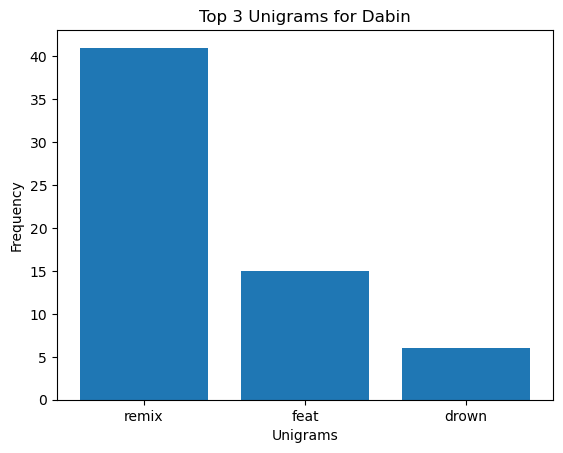

In [30]:
# Example 4

#I am creating a dictionary here titled inputdata
inputdata={}
#I am assigning the content of the csv file to my dictionary
#header is my row in the csv file that is why header is 0 below
inputdata = pandas.read_csv('Dabin.csv', header=[0], index_col=0).to_dict()

#We can use type to check the data type of a variable
#print(type(inputdata))

#I am using the column headers from the csv file to find the data I am interested to analyze

# I created a new dictionary here for the description column in my csv file
descriptiondictionary = inputdata.get('name')
#print(type(descriptiondictionary))

# I am converting the dictionary to a list so I can analyze the data
descriptionlist =  list(descriptiondictionary.values())
#print(type(descriptionlist))

#convert list to string
#I need the data in string format for analysis purposes
descriptioninstring = ''
for eachletter in  descriptionlist:
    descriptioninstring += ' '+ str(eachletter)

#print(descriptioninstring)

#Make the string lower case
lowercasedescriptions=descriptioninstring.lower()
#print(lowercasedescriptions)

#remove the url from text to prevent a future error
lowercasedescriptions= re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', lowercasedescriptions)
#print(lowercasedescriptions)

#remove anything that does not make sense to you from the string
lowercasedescriptions = lowercasedescriptions.replace(".", "")
lowercasedescriptions = lowercasedescriptions.replace("#", "")
lowercasedescriptions = lowercasedescriptions.replace(",", "")
lowercasedescriptions = lowercasedescriptions.replace("''", "")
lowercasedescriptions = lowercasedescriptions.replace('""', "")
lowercasedescriptions = lowercasedescriptions.replace('"', "")
lowercasedescriptions = lowercasedescriptions.replace('(', "")
lowercasedescriptions = lowercasedescriptions.replace(')', "")
lowercasedescriptions = lowercasedescriptions.replace('-', "")
lowercasedescriptions = lowercasedescriptions.replace('&', "")


#remove the stop or common words from the string
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('stopwords')
#print(stopwords.words('english'))

description_tokens = word_tokenize(lowercasedescriptions)

description_tokens_without_stopwords = [word for word in description_tokens if not word in stopwords.words()]

#print(description_tokens_without_stopwords )

unigrams = ngrams(description_tokens_without_stopwords, 1)
bigrams = ngrams(description_tokens_without_stopwords,2)
trigrams = ngrams(description_tokens_without_stopwords,3)

#print (Counter(unigrams))
#print (Counter(bigrams))
#print (Counter(trigrams))

mostcommonunigrams = Counter(unigrams)
#This will print top 3 unigrams
print(mostcommonunigrams.most_common(3))
#print(type(mostcommonunigrams))

mostcommonbigrams = Counter(bigrams)
print(mostcommonbigrams.most_common(3))

mostcommontrigrams = Counter(trigrams)
print(mostcommontrigrams.most_common(3))


#Draw a histogram of top 3 unigrams
top3unigrams = mostcommonunigrams.most_common(3)
top3unigrams_keys = []
top3unigrams_values = []
import re
for i in range(len(top3unigrams)):
    #print(top3unigrams[i][0][0])
    top3unigrams_keys.append(top3unigrams[i][0][0])
    top3unigrams_values.append(top3unigrams[i][1])

#print(top3unigrams_keys)
#print(top3unigrams_values)

import matplotlib.pyplot as plt

plt.bar(top3unigrams_keys, top3unigrams_values)
plt.title("Top 3 Unigrams for Dabin")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(('feat',), 38), (('remix',), 37), (('mixed',), 7)]
[(('feat', 'tyler'), 6), (('tyler', 'graves'), 6), (('remix', 'mixed'), 5)]
[(('feat', 'tyler', 'graves'), 6), (('feat', 'gg', 'magree'), 5), (('stop', 'feat', 'lights'), 3)]


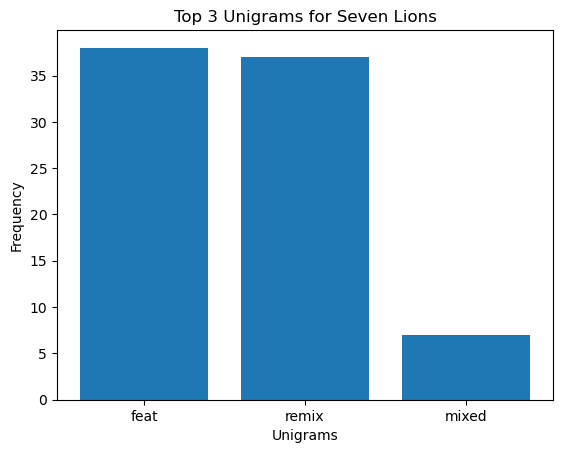

In [33]:
# Example 4

#I am creating a dictionary here titled inputdata
inputdata={}
#I am assigning the content of the csv file to my dictionary
#header is my row in the csv file that is why header is 0 below
inputdata = pandas.read_csv('Lions.csv', header=[0], index_col=0).to_dict()

#We can use type to check the data type of a variable
#print(type(inputdata))

#I am using the column headers from the csv file to find the data I am interested to analyze

# I created a new dictionary here for the description column in my csv file
descriptiondictionary = inputdata.get('name')
#print(type(descriptiondictionary))

# I am converting the dictionary to a list so I can analyze the data
descriptionlist =  list(descriptiondictionary.values())
#print(type(descriptionlist))

#convert list to string
#I need the data in string format for analysis purposes
descriptioninstring = ''
for eachletter in  descriptionlist:
    descriptioninstring += ' '+ str(eachletter)

#print(descriptioninstring)

#Make the string lower case
lowercasedescriptions=descriptioninstring.lower()
#print(lowercasedescriptions)

#remove the url from text to prevent a future error
lowercasedescriptions= re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', lowercasedescriptions)
#print(lowercasedescriptions)

#remove anything that does not make sense to you from the string
lowercasedescriptions = lowercasedescriptions.replace(".", "")
lowercasedescriptions = lowercasedescriptions.replace("#", "")
lowercasedescriptions = lowercasedescriptions.replace(",", "")
lowercasedescriptions = lowercasedescriptions.replace("''", "")
lowercasedescriptions = lowercasedescriptions.replace('""', "")
lowercasedescriptions = lowercasedescriptions.replace('"', "")
lowercasedescriptions = lowercasedescriptions.replace('(', "")
lowercasedescriptions = lowercasedescriptions.replace(')', "")
lowercasedescriptions = lowercasedescriptions.replace('-', "")
lowercasedescriptions = lowercasedescriptions.replace('&', "")
lowercasedescriptions = lowercasedescriptions.replace('Seven', "") # Collaborations involve self-reference name in title
lowercasedescriptions = lowercasedescriptions.replace('lions', "")

#remove the stop or common words from the string
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('stopwords')
#print(stopwords.words('english'))

description_tokens = word_tokenize(lowercasedescriptions)

description_tokens_without_stopwords = [word for word in description_tokens if not word in stopwords.words()]

#print(description_tokens_without_stopwords )

unigrams = ngrams(description_tokens_without_stopwords, 1)
bigrams = ngrams(description_tokens_without_stopwords,2)
trigrams = ngrams(description_tokens_without_stopwords,3)

#print (Counter(unigrams))
#print (Counter(bigrams))
#print (Counter(trigrams))

mostcommonunigrams = Counter(unigrams)
#This will print top 3 unigrams
print(mostcommonunigrams.most_common(3))
#print(type(mostcommonunigrams))

mostcommonbigrams = Counter(bigrams)
print(mostcommonbigrams.most_common(3))

mostcommontrigrams = Counter(trigrams)
print(mostcommontrigrams.most_common(3))


#Draw a histogram of top 3 unigrams
top3unigrams = mostcommonunigrams.most_common(3)
top3unigrams_keys = []
top3unigrams_values = []
import re
for i in range(len(top3unigrams)):
    #print(top3unigrams[i][0][0])
    top3unigrams_keys.append(top3unigrams[i][0][0])
    top3unigrams_values.append(top3unigrams[i][1])

#print(top3unigrams_keys)
#print(top3unigrams_values)

import matplotlib.pyplot as plt

plt.bar(top3unigrams_keys, top3unigrams_values)
plt.title("Top 3 Unigrams for Seven Lions")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(('remix',), 113), (('feat',), 17), (('side',), 8)]
[(('things', 'fall'), 6), (('fall', 'jon'), 6), (('jon', 'bellion'), 6)]
[(('things', 'fall', 'jon'), 6), (('fall', 'jon', 'bellion'), 6), (('remix', 'side', 'feat'), 5)]


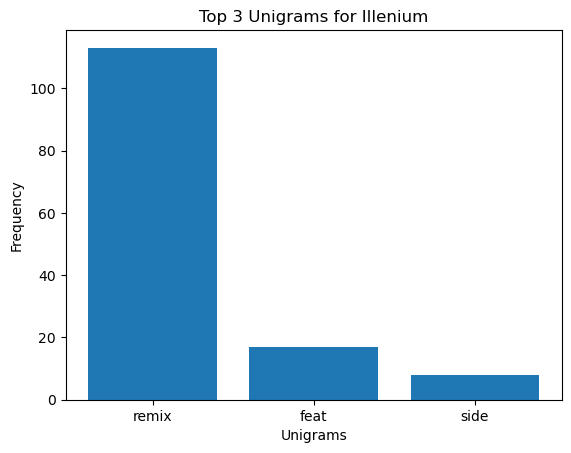

In [35]:
# Example 4

#I am creating a dictionary here titled inputdata
inputdata={}
#I am assigning the content of the csv file to my dictionary
#header is my row in the csv file that is why header is 0 below
inputdata = pandas.read_csv('Illenium.csv', header=[0], index_col=0).to_dict()

#We can use type to check the data type of a variable
#print(type(inputdata))

#I am using the column headers from the csv file to find the data I am interested to analyze

# I created a new dictionary here for the description column in my csv file
descriptiondictionary = inputdata.get('name')
#print(type(descriptiondictionary))

# I am converting the dictionary to a list so I can analyze the data
descriptionlist =  list(descriptiondictionary.values())
#print(type(descriptionlist))

#convert list to string
#I need the data in string format for analysis purposes
descriptioninstring = ''
for eachletter in  descriptionlist:
    descriptioninstring += ' '+ str(eachletter)

#print(descriptioninstring)

#Make the string lower case
lowercasedescriptions=descriptioninstring.lower()
#print(lowercasedescriptions)

#remove the url from text to prevent a future error
lowercasedescriptions= re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', lowercasedescriptions)
#print(lowercasedescriptions)

#remove anything that does not make sense to you from the string
lowercasedescriptions = lowercasedescriptions.replace(".", "")
lowercasedescriptions = lowercasedescriptions.replace("#", "")
lowercasedescriptions = lowercasedescriptions.replace(",", "")
lowercasedescriptions = lowercasedescriptions.replace("''", "")
lowercasedescriptions = lowercasedescriptions.replace('""', "")
lowercasedescriptions = lowercasedescriptions.replace('"', "")
lowercasedescriptions = lowercasedescriptions.replace('(', "")
lowercasedescriptions = lowercasedescriptions.replace(')', "")
lowercasedescriptions = lowercasedescriptions.replace('-', "")
lowercasedescriptions = lowercasedescriptions.replace('&', "")
lowercasedescriptions = lowercasedescriptions.replace('[', "")
lowercasedescriptions = lowercasedescriptions.replace(']', "")

#remove the stop or common words from the string
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('stopwords')
#print(stopwords.words('english'))

description_tokens = word_tokenize(lowercasedescriptions)

description_tokens_without_stopwords = [word for word in description_tokens if not word in stopwords.words()]

#print(description_tokens_without_stopwords )

unigrams = ngrams(description_tokens_without_stopwords, 1)
bigrams = ngrams(description_tokens_without_stopwords,2)
trigrams = ngrams(description_tokens_without_stopwords,3)

#print (Counter(unigrams))
#print (Counter(bigrams))
#print (Counter(trigrams))

mostcommonunigrams = Counter(unigrams)
#This will print top 3 unigrams
print(mostcommonunigrams.most_common(3))
#print(type(mostcommonunigrams))

mostcommonbigrams = Counter(bigrams)
print(mostcommonbigrams.most_common(3))

mostcommontrigrams = Counter(trigrams)
print(mostcommontrigrams.most_common(3))


#Draw a histogram of top 3 unigrams
top3unigrams = mostcommonunigrams.most_common(3)
top3unigrams_keys = []
top3unigrams_values = []
import re
for i in range(len(top3unigrams)):
    #print(top3unigrams[i][0][0])
    top3unigrams_keys.append(top3unigrams[i][0][0])
    top3unigrams_values.append(top3unigrams[i][1])

#print(top3unigrams_keys)
#print(top3unigrams_values)

import matplotlib.pyplot as plt

plt.bar(top3unigrams_keys, top3unigrams_values)
plt.title("Top 3 Unigrams for Illenium")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.show()


# Regression

## Addressing Multi-collinearity

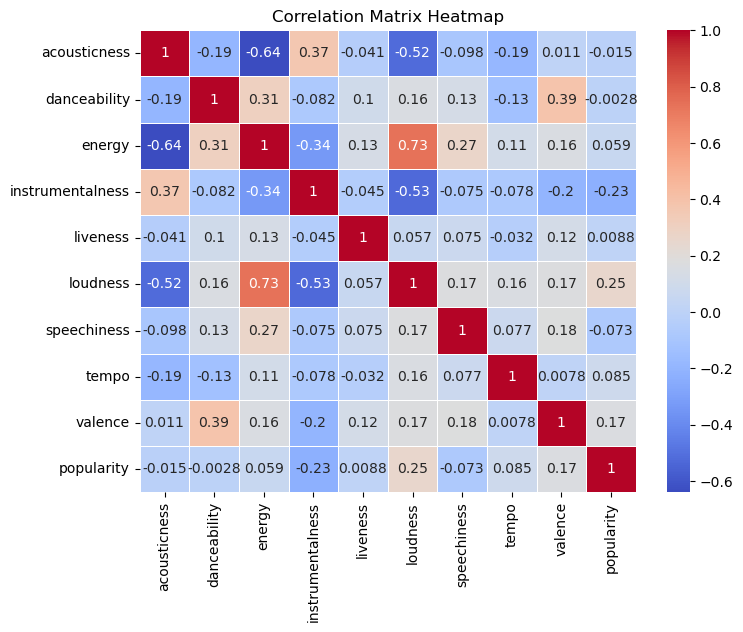

In [41]:
# Visualizing Pearson correlations 

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

select_columns = ['acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity']

# Calculating the correlation matrix
corr_matrix = songs_df[select_columns].corr()

# Generating a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [39]:
# Example 5 -- Checking VIF/ Collinearity 

!pip install scikit-learn
!pip install statsmodels


import pandas
import numpy
from statsmodels.stats.outliers_influence import variance_inflation_factor


#import input data
input_dataframe=pandas.read_csv("songs.csv")

filtered_input_dataframe = input_dataframe.dropna()

independent_variables = filtered_input_dataframe[['acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']]

#print("Correlations Among Independent Variables in the Dataset")
#Calculate the correlations among all columns from the CSV fil e
#High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
#Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
#Low degree: When the value lies below + .29, then it is said to be a small correlation.


print(independent_variables.corr(method ='pearson'))

#Variation Inflation Score
#Are independent variables really independent?
#VIF is another metric to answer this question besides pearson correlation
#As long as VIF is below 3, you are good.
#Some consider 5 as threshold value.
#Google: Generally, VIF above 4 indicated multicollinearity exists.
#Multicollinearity is bad because it makes changing one variable hard without changing another variable. 
#Multicollinearity makes it difficult for the regression model to estimate the relationship bwtween each independent variable and the dependent variable
vif_data = pandas.DataFrame()
vif_data["Independent Variable"] = independent_variables.columns

# calculating VIF for each feature
vif_data["Variance Inflation Score"] = [variance_inflation_factor(independent_variables.values, i)
						for i in range(len(independent_variables.columns))]

print("\n")

print(vif_data) # This part only identifies which VIF scores might be problem. Doesn't tell which variables are related


                  acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000     -0.193592 -0.639319          0.367306   
danceability         -0.193592      1.000000  0.306917         -0.082127   
energy               -0.639319      0.306917  1.000000         -0.337114   
instrumentalness      0.367306     -0.082127 -0.337114          1.000000   
liveness             -0.041412      0.103305  0.129377         -0.044508   
loudness             -0.521887      0.156157  0.734505         -0.527575   
speechiness          -0.098181      0.127602  0.267075         -0.075201   
tempo                -0.188053     -0.132394  0.113625         -0.077757   
valence               0.011167      0.391227  0.156626         -0.202331   

                  liveness  loudness  speechiness     tempo   valence  
acousticness     -0.041412 -0.521887    -0.098181 -0.188053  0.011167  
danceability      0.103305  0.156157     0.127602 -0.132394  0.391227  
energy            0.129

In [46]:
# Example 5 -- Checking VIF/ Collinearity 


#import input data
input_dataframe=pandas.read_csv("songs.csv")

filtered_input_dataframe = input_dataframe.dropna()


## Energy was removed because it had the largest VIF
independent_variables = filtered_input_dataframe[['acousticness','danceability','instrumentalness','liveness','loudness','speechiness','tempo','valence']]

#print("Correlations Among Independent Variables in the Dataset")
#Calculate the correlations among all columns from the CSV fil e
#High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
#Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
#Low degree: When the value lies below + .29, then it is said to be a small correlation.


print(independent_variables.corr(method ='pearson'))

#Variation Inflation Score
#Are independent variables really independent?
#VIF is another metric to answer this question besides pearson correlation
#As long as VIF is below 3, you are good.
#Some consider 5 as threshold value.
#Google: Generally, VIF above 4 indicated multicollinearity exists.
#Multicollinearity is bad because it makes changing one variable hard without changing another variable. 
#Multicollinearity makes it difficult for the regression model to estimate the relationship bwtween each independent variable and the dependent variable
vif_data = pandas.DataFrame()
vif_data["Independent Variable"] = independent_variables.columns

# calculating VIF for each feature
vif_data["Variance Inflation Score"] = [variance_inflation_factor(independent_variables.values, i)
						for i in range(len(independent_variables.columns))]

print("\n")

print(vif_data) # This part only identifies which VIF scores might be problem. Doesn't tell which variables are related


                  acousticness  danceability  instrumentalness  liveness  \
acousticness          1.000000     -0.193592          0.367306 -0.041412   
danceability         -0.193592      1.000000         -0.082127  0.103305   
instrumentalness      0.367306     -0.082127          1.000000 -0.044508   
liveness             -0.041412      0.103305         -0.044508  1.000000   
loudness             -0.521887      0.156157         -0.527575  0.056542   
speechiness          -0.098181      0.127602         -0.075201  0.074639   
tempo                -0.188053     -0.132394         -0.077757 -0.031629   
valence               0.011167      0.391227         -0.202331  0.119034   

                  loudness  speechiness     tempo   valence  
acousticness     -0.521887    -0.098181 -0.188053  0.011167  
danceability      0.156157     0.127602 -0.132394  0.391227  
instrumentalness -0.527575    -0.075201 -0.077757 -0.202331  
liveness          0.056542     0.074639 -0.031629  0.119034  
loudn

In [47]:
# Example 5 -- Checking VIF/ Collinearity 


#import input data
input_dataframe=pandas.read_csv("songs.csv")

filtered_input_dataframe = input_dataframe.dropna()

## Now remove danceability 
## Energy was removed because it had the largest VIF
independent_variables = filtered_input_dataframe[['acousticness','instrumentalness','liveness','loudness','speechiness','tempo','valence']]

#print("Correlations Among Independent Variables in the Dataset")
#Calculate the correlations among all columns from the CSV fil e
#High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
#Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
#Low degree: When the value lies below + .29, then it is said to be a small correlation.


print(independent_variables.corr(method ='pearson'))

#Variation Inflation Score
#Are independent variables really independent?
#VIF is another metric to answer this question besides pearson correlation
#As long as VIF is below 3, you are good.
#Some consider 5 as threshold value.
#Google: Generally, VIF above 4 indicated multicollinearity exists.
#Multicollinearity is bad because it makes changing one variable hard without changing another variable. 
#Multicollinearity makes it difficult for the regression model to estimate the relationship bwtween each independent variable and the dependent variable
vif_data = pandas.DataFrame()
vif_data["Independent Variable"] = independent_variables.columns

# calculating VIF for each feature
vif_data["Variance Inflation Score"] = [variance_inflation_factor(independent_variables.values, i)
						for i in range(len(independent_variables.columns))]

print("\n")

print(vif_data) # This part only identifies which VIF scores might be problem. Doesn't tell which variables are related


                  acousticness  instrumentalness  liveness  loudness  \
acousticness          1.000000          0.367306 -0.041412 -0.521887   
instrumentalness      0.367306          1.000000 -0.044508 -0.527575   
liveness             -0.041412         -0.044508  1.000000  0.056542   
loudness             -0.521887         -0.527575  0.056542  1.000000   
speechiness          -0.098181         -0.075201  0.074639  0.167855   
tempo                -0.188053         -0.077757 -0.031629  0.155031   
valence               0.011167         -0.202331  0.119034  0.168884   

                  speechiness     tempo   valence  
acousticness        -0.098181 -0.188053  0.011167  
instrumentalness    -0.075201 -0.077757 -0.202331  
liveness             0.074639 -0.031629  0.119034  
loudness             0.167855  0.155031  0.168884  
speechiness          1.000000  0.076926  0.176512  
tempo                0.076926  1.000000  0.007753  
valence              0.176512  0.007753  1.000000  


  Ind

In [40]:
print(songs_df.columns)

Index(['artist', 'album', 'track_number', 'id', 'name', 'uri', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity'],
      dtype='object')


## Lasso 

In [48]:
# Example 6 - Lasso w/o Normalized data 

import pandas
import numpy
from sklearn.model_selection import train_test_split


print('Lasso without normalized data \n \n')


#import input data
input_dataframe=pandas.read_csv("songs.csv")


filtered_input_dataframe = input_dataframe.dropna()

#Scikit-Learn's linear regression model expects a 2 dimensional array inputs. But, based on our dataset, we have a 1 dimensional array for independent and dependent variables.
#The purpose of reshape below is to convert 1 dimensional scores and hours array values to 2 2-dimensional arrays.

dependent_variable_array = filtered_input_dataframe['popularity'].values.reshape(-1, 1)

#Without this, you will get a warning message in the output
dependent_variable_array = numpy.squeeze(dependent_variable_array)

#We create an array below that contains three independent variables, features, or columns from the csv file
independent_variable_array = filtered_input_dataframe[['acousticness','instrumentalness','liveness','loudness','speechiness','tempo','valence']].values

#Split the data into train and test sets
dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
mymodel = LassoCV(cv=5, random_state=0, max_iter=10000)

# Load Training data to the model

mymodel.fit(independent_variable_train,dependent_variable_train)

#display alpha that produced the lowest test MSE
#as alpha value gets closer to 1, the number of independent variables in the model becomes smaller 
print("Alpha that produces lowest MSE:", mymodel.alpha_)


#This prints the a value in the y=ax+b model
print("a value:", mymodel.intercept_.round(decimals=1))
#This prints the a value in the y=ax+b
print("b values:", mymodel.coef_.round(decimals=1))
print("\n")

#Make predictions based on test data which we have not used yet
predicted_values = mymodel.predict(independent_variable_test)

#Compare actual scores with the predicted scores within the dataset
#Numpy's Squeze method removes single-dimensional entries from the shape of an array.
predictions_dataframe = pandas.DataFrame({'Actual Popularity Score': dependent_variable_test.squeeze(), 'Predicted Popularity Score': predicted_values.squeeze()})
print(predictions_dataframe)


#Evaluate the model
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

#These are model evaluation metrics used with regression models
#r squared it indicates how well the model fits the data
#with a value closer to 1 signifying a better fit and a value closer to 0 indicating a poor fit.

r_squared = r2_score(dependent_variable_test, predicted_values)


#mean absolute error gives the mean of absolute difference between model prediction and target value
# E.g., MAE=10 implies that, on average, the forecast's distance from the true value is 10
meanabsoluteerror = mean_absolute_error(dependent_variable_test, predicted_values)

#Average of the square of the difference between actual and estimated values
#This value will always be positive. The lower the value, the better is our model
meansquarederror = mean_squared_error(dependent_variable_test, predicted_values)

#This is the standard deviation of the prediction errors
#Based on a rule of thumb, it can be said that values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.
#This value can be greater than 1. Lower values indicate a better fit of a model.
rootmeansquarederror = numpy.sqrt(meansquarederror)


print("\n")
print(f'R Squared Value: {r_squared:.2f}')
print(f'Mean absolute error: {meanabsoluteerror:.2f}')
print(f'Mean squared error: {meansquarederror:.2f}')
print(f'Root mean squared error: {rootmeansquarederror:.2f}') 


Lasso without normalized data 
 

Alpha that produces lowest MSE: 0.031588967343538846
a value: 31.0
b values: [ 12.5  -8.2  -1.3   1.4 -18.5   0.    7.2]


    Actual Popularity Score  Predicted Popularity Score
0                        50                   31.287414
1                        23                   32.125775
2                        27                   24.470091
3                        46                   33.488657
4                        43                   30.882037
..                      ...                         ...
81                       33                   25.470220
82                       55                   32.495491
83                       44                   29.519019
84                       42                   30.546366
85                       43                   31.253818

[86 rows x 2 columns]


R Squared Value: 0.05
Mean absolute error: 10.89
Mean squared error: 163.43
Root mean squared error: 12.78


In [49]:
# Example 8  -- Normalize data 
import pandas

#import input data
input_dataframe=pandas.read_csv("songs.csv")

#Check to see if input data is loaded properly
#print(input_dataframe)
#Or
#The head function gets the first 5 rows.
#print(input_dataframe.head())

import numpy as np
import scipy.stats as stats

album_series=input_dataframe['album']
track_number_series=input_dataframe['track_number']
name_series=input_dataframe['name']
acousticness_series=input_dataframe['acousticness']
danceability_series=input_dataframe['danceability']
energy_series=input_dataframe['energy']
instrumentalness_series=input_dataframe['instrumentalness']
liveness_series=input_dataframe['liveness']
loudness_series=input_dataframe['loudness']
speechiness_series=input_dataframe['speechiness']
tempo_series=input_dataframe['tempo']
valence_series=input_dataframe['valence']
popularity_series=input_dataframe['popularity']

#Transform Data via Z Score Scaling
acousticness_index=stats.zscore(acousticness_series)
danceability_index=stats.zscore(danceability_series)
energy_index=stats.zscore(energy_series)
instrumentalness_index=stats.zscore(instrumentalness_series)
liveness_index=stats.zscore(liveness_series)
loudness_index=stats.zscore(loudness_series)
speechiness_index=stats.zscore(speechiness_series)
tempo_index=stats.zscore(tempo_series)
valence_index=stats.zscore(valence_series)
popularity_index=stats.zscore(popularity_series)


result_dictionary = {'album':album_series,'track_number':track_number_series, 'name':name_series,'acousticness':acousticness_index, 'danceability':danceability_index,'energy':energy_index,'instrumentalness':instrumentalness_index,'liveness':liveness_index,'loudness':loudness_index,'speechiness':speechiness_index,'tempo':tempo_index,'valence':valence_index,'popularity':popularity_index}

result_dataframe = pandas.DataFrame(result_dictionary)

result_dataframe.to_csv('songs_norm.csv', index=True)  

print("done")


done


In [51]:
# Example 6 - Lasso w/ Normalized data 

import pandas
import numpy
from sklearn.model_selection import train_test_split


print('Lasso with normalized data \n \n')


#import input data
input_dataframe=pandas.read_csv("songs_norm.csv")


filtered_input_dataframe = input_dataframe.dropna()

#Scikit-Learn's linear regression model expects a 2 dimensional array inputs. But, based on our dataset, we have a 1 dimensional array for independent and dependent variables.
#The purpose of reshape below is to convert 1 dimensional scores and hours array values to 2 2-dimensional arrays.

dependent_variable_array = filtered_input_dataframe['popularity'].values.reshape(-1, 1)

#Without this, you will get a warning message in the output
dependent_variable_array = numpy.squeeze(dependent_variable_array)

#We create an array below that contains three independent variables, features, or columns from the csv file
independent_variable_array = filtered_input_dataframe[['acousticness','instrumentalness','liveness','loudness','speechiness','tempo','valence']].values

#Split the data into train and test sets
dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
mymodel = LassoCV(cv=5, random_state=0, max_iter=10000)

# Load Training data to the model

mymodel.fit(independent_variable_train,dependent_variable_train)

#display alpha that produced the lowest test MSE
#as alpha value gets closer to 1, the number of independent variables in the model becomes smaller 
print("Alpha that produces lowest MSE:", mymodel.alpha_)


#This prints the a value in the y=ax+b model
print("a value:", mymodel.intercept_.round(decimals=1))
#This prints the a value in the y=ax+b
print("b values:", mymodel.coef_.round(decimals=1))
print("\n")

#Make predictions based on test data which we have not used yet
predicted_values = mymodel.predict(independent_variable_test)

#Compare actual scores with the predicted scores within the dataset
#Numpy's Squeze method removes single-dimensional entries from the shape of an array.
predictions_dataframe = pandas.DataFrame({'Actual Popularity Score': dependent_variable_test.squeeze(), 'Predicted Popularity Score': predicted_values.squeeze()})
print(predictions_dataframe)


#Evaluate the model
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

#These are model evaluation metrics used with regression models
#r squared it indicates how well the model fits the data
#with a value closer to 1 signifying a better fit and a value closer to 0 indicating a poor fit.

r_squared = r2_score(dependent_variable_test, predicted_values)


#mean absolute error gives the mean of absolute difference between model prediction and target value
# E.g., MAE=10 implies that, on average, the forecast's distance from the true value is 10
meanabsoluteerror = mean_absolute_error(dependent_variable_test, predicted_values)

#Average of the square of the difference between actual and estimated values
#This value will always be positive. The lower the value, the better is our model
meansquarederror = mean_squared_error(dependent_variable_test, predicted_values)

#This is the standard deviation of the prediction errors
#Based on a rule of thumb, it can be said that values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.
#This value can be greater than 1. Lower values indicate a better fit of a model.
rootmeansquarederror = numpy.sqrt(meansquarederror)


print("\n")
print(f'R Squared Value: {r_squared:.2f}')
print(f'Mean absolute error: {meanabsoluteerror:.2f}')
print(f'Mean squared error: {meansquarederror:.2f}')
print(f'Root mean squared error: {rootmeansquarederror:.2f}') 


Lasso with normalized data 
 

Alpha that produces lowest MSE: 0.015866463541471428
a value: -0.0
b values: [ 0.2 -0.1 -0.   0.2 -0.1  0.1  0.1]


    Actual Popularity Score  Predicted Popularity Score
0                  1.578306                    0.128091
1                 -0.491144                    0.173123
2                 -0.184559                   -0.395091
3                  1.271721                    0.322193
4                  1.041782                    0.116684
..                      ...                         ...
81                 0.275319                   -0.462926
82                 1.961537                    0.266310
83                 1.118428                    0.055953
84                 0.965136                    0.093086
85                 1.041782                    0.110295

[86 rows x 2 columns]


R Squared Value: 0.06
Mean absolute error: 0.83
Mean squared error: 0.96
Root mean squared error: 0.98


## Additional Tests

In this part, I assume that VIF may still play a role in the regression. I will first remove tempo (and any subsequent high VIF predictors if applicable) to see if that might make any changes to the R Squared value of the regression.

In [52]:
# Example 5 -- Checking VIF/ Collinearity 


#import input data
input_dataframe=pandas.read_csv("songs.csv")

filtered_input_dataframe = input_dataframe.dropna()

## Now remove tempo
independent_variables = filtered_input_dataframe[['acousticness','instrumentalness','liveness','loudness','speechiness','valence']]

#print("Correlations Among Independent Variables in the Dataset")
#Calculate the correlations among all columns from the CSV fil e
#High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
#Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
#Low degree: When the value lies below + .29, then it is said to be a small correlation.


print(independent_variables.corr(method ='pearson'))

#Variation Inflation Score
#Are independent variables really independent?
#VIF is another metric to answer this question besides pearson correlation
#As long as VIF is below 3, you are good.
#Some consider 5 as threshold value.
#Google: Generally, VIF above 4 indicated multicollinearity exists.
#Multicollinearity is bad because it makes changing one variable hard without changing another variable. 
#Multicollinearity makes it difficult for the regression model to estimate the relationship bwtween each independent variable and the dependent variable
vif_data = pandas.DataFrame()
vif_data["Independent Variable"] = independent_variables.columns

# calculating VIF for each feature
vif_data["Variance Inflation Score"] = [variance_inflation_factor(independent_variables.values, i)
						for i in range(len(independent_variables.columns))]

print("\n")

print(vif_data) # This part only identifies which VIF scores might be problem. Doesn't tell which variables are related


                  acousticness  instrumentalness  liveness  loudness  \
acousticness          1.000000          0.367306 -0.041412 -0.521887   
instrumentalness      0.367306          1.000000 -0.044508 -0.527575   
liveness             -0.041412         -0.044508  1.000000  0.056542   
loudness             -0.521887         -0.527575  0.056542  1.000000   
speechiness          -0.098181         -0.075201  0.074639  0.167855   
valence               0.011167         -0.202331  0.119034  0.168884   

                  speechiness   valence  
acousticness        -0.098181  0.011167  
instrumentalness    -0.075201 -0.202331  
liveness             0.074639  0.119034  
loudness             0.167855  0.168884  
speechiness          1.000000  0.176512  
valence              0.176512  1.000000  


  Independent Variable  Variance Inflation Score
0         acousticness                  1.855998
1     instrumentalness                  1.602997
2             liveness                  2.649879
3  

In [53]:
# Example 6 - Lasso w/ Normalized data 

import pandas
import numpy
from sklearn.model_selection import train_test_split


print('Lasso with normalized data \n \n')


#import input data
input_dataframe=pandas.read_csv("songs_norm.csv")


filtered_input_dataframe = input_dataframe.dropna()

#Scikit-Learn's linear regression model expects a 2 dimensional array inputs. But, based on our dataset, we have a 1 dimensional array for independent and dependent variables.
#The purpose of reshape below is to convert 1 dimensional scores and hours array values to 2 2-dimensional arrays.

dependent_variable_array = filtered_input_dataframe['popularity'].values.reshape(-1, 1)

#Without this, you will get a warning message in the output
dependent_variable_array = numpy.squeeze(dependent_variable_array)

#We create an array below that contains three independent variables, features, or columns from the csv file
independent_variable_array = filtered_input_dataframe[['acousticness','instrumentalness','liveness','loudness','speechiness','valence']].values

#Split the data into train and test sets
dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
mymodel = LassoCV(cv=5, random_state=0, max_iter=10000)

# Load Training data to the model

mymodel.fit(independent_variable_train,dependent_variable_train)

#display alpha that produced the lowest test MSE
#as alpha value gets closer to 1, the number of independent variables in the model becomes smaller 
print("Alpha that produces lowest MSE:", mymodel.alpha_)


#This prints the a value in the y=ax+b model
print("a value:", mymodel.intercept_.round(decimals=1))
#This prints the a value in the y=ax+b
print("b values:", mymodel.coef_.round(decimals=1))
print("\n")

#Make predictions based on test data which we have not used yet
predicted_values = mymodel.predict(independent_variable_test)

#Compare actual scores with the predicted scores within the dataset
#Numpy's Squeze method removes single-dimensional entries from the shape of an array.
predictions_dataframe = pandas.DataFrame({'Actual Popularity Score': dependent_variable_test.squeeze(), 'Predicted Popularity Score': predicted_values.squeeze()})
print(predictions_dataframe)


#Evaluate the model
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

#These are model evaluation metrics used with regression models
#r squared it indicates how well the model fits the data
#with a value closer to 1 signifying a better fit and a value closer to 0 indicating a poor fit.

r_squared = r2_score(dependent_variable_test, predicted_values)


#mean absolute error gives the mean of absolute difference between model prediction and target value
# E.g., MAE=10 implies that, on average, the forecast's distance from the true value is 10
meanabsoluteerror = mean_absolute_error(dependent_variable_test, predicted_values)

#Average of the square of the difference between actual and estimated values
#This value will always be positive. The lower the value, the better is our model
meansquarederror = mean_squared_error(dependent_variable_test, predicted_values)

#This is the standard deviation of the prediction errors
#Based on a rule of thumb, it can be said that values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.
#This value can be greater than 1. Lower values indicate a better fit of a model.
rootmeansquarederror = numpy.sqrt(meansquarederror)


print("\n")
print(f'R Squared Value: {r_squared:.2f}')
print(f'Mean absolute error: {meanabsoluteerror:.2f}')
print(f'Mean squared error: {meansquarederror:.2f}')
print(f'Root mean squared error: {rootmeansquarederror:.2f}') 


Lasso with normalized data 
 

Alpha that produces lowest MSE: 0.015866463541471428
a value: -0.0
b values: [ 0.2 -0.1 -0.   0.2 -0.1  0.1]


    Actual Popularity Score  Predicted Popularity Score
0                  1.578306                    0.096533
1                 -0.491144                    0.127606
2                 -0.184559                   -0.435987
3                  1.271721                    0.305038
4                  1.041782                    0.108839
..                      ...                         ...
81                 0.275319                   -0.568116
82                 1.961537                    0.294324
83                 1.118428                    0.147607
84                 0.965136                    0.082609
85                 1.041782                    0.046288

[86 rows x 2 columns]


R Squared Value: 0.05
Mean absolute error: 0.84
Mean squared error: 0.96
Root mean squared error: 0.98


In [54]:
# Example 5 -- Checking VIF/ Collinearity 


#import input data
input_dataframe=pandas.read_csv("songs.csv")

filtered_input_dataframe = input_dataframe.dropna()

## Now remove loudness 

independent_variables = filtered_input_dataframe[['acousticness','instrumentalness','liveness','speechiness','valence']]

#print("Correlations Among Independent Variables in the Dataset")
#Calculate the correlations among all columns from the CSV fil e
#High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
#Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
#Low degree: When the value lies below + .29, then it is said to be a small correlation.


print(independent_variables.corr(method ='pearson'))

#Variation Inflation Score
#Are independent variables really independent?
#VIF is another metric to answer this question besides pearson correlation
#As long as VIF is below 3, you are good.
#Some consider 5 as threshold value.
#Google: Generally, VIF above 4 indicated multicollinearity exists.
#Multicollinearity is bad because it makes changing one variable hard without changing another variable. 
#Multicollinearity makes it difficult for the regression model to estimate the relationship bwtween each independent variable and the dependent variable
vif_data = pandas.DataFrame()
vif_data["Independent Variable"] = independent_variables.columns

# calculating VIF for each feature
vif_data["Variance Inflation Score"] = [variance_inflation_factor(independent_variables.values, i)
						for i in range(len(independent_variables.columns))]

print("\n")

print(vif_data) # This part only identifies which VIF scores might be problem. Doesn't tell which variables are related


                  acousticness  instrumentalness  liveness  speechiness  \
acousticness          1.000000          0.367306 -0.041412    -0.098181   
instrumentalness      0.367306          1.000000 -0.044508    -0.075201   
liveness             -0.041412         -0.044508  1.000000     0.074639   
speechiness          -0.098181         -0.075201  0.074639     1.000000   
valence               0.011167         -0.202331  0.119034     0.176512   

                   valence  
acousticness      0.011167  
instrumentalness -0.202331  
liveness          0.119034  
speechiness       0.176512  
valence           1.000000  


  Independent Variable  Variance Inflation Score
0         acousticness                  1.558349
1     instrumentalness                  1.320729
2             liveness                  2.355592
3          speechiness                  2.189727
4              valence                  3.003100


In [55]:
# Example 6 - Lasso w/ Normalized data 

import pandas
import numpy
from sklearn.model_selection import train_test_split


print('Lasso with normalized data \n \n')


#import input data
input_dataframe=pandas.read_csv("songs_norm.csv")


filtered_input_dataframe = input_dataframe.dropna()

#Scikit-Learn's linear regression model expects a 2 dimensional array inputs. But, based on our dataset, we have a 1 dimensional array for independent and dependent variables.
#The purpose of reshape below is to convert 1 dimensional scores and hours array values to 2 2-dimensional arrays.

dependent_variable_array = filtered_input_dataframe['popularity'].values.reshape(-1, 1)

#Without this, you will get a warning message in the output
dependent_variable_array = numpy.squeeze(dependent_variable_array)

#We create an array below that contains three independent variables, features, or columns from the csv file
independent_variable_array = filtered_input_dataframe[['acousticness','instrumentalness','liveness','speechiness','valence']].values

#Split the data into train and test sets
dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
mymodel = LassoCV(cv=5, random_state=0, max_iter=10000)

# Load Training data to the model

mymodel.fit(independent_variable_train,dependent_variable_train)

#display alpha that produced the lowest test MSE
#as alpha value gets closer to 1, the number of independent variables in the model becomes smaller 
print("Alpha that produces lowest MSE:", mymodel.alpha_)


#This prints the a value in the y=ax+b model
print("a value:", mymodel.intercept_.round(decimals=1))
#This prints the a value in the y=ax+b
print("b values:", mymodel.coef_.round(decimals=1))
print("\n")

#Make predictions based on test data which we have not used yet
predicted_values = mymodel.predict(independent_variable_test)

#Compare actual scores with the predicted scores within the dataset
#Numpy's Squeze method removes single-dimensional entries from the shape of an array.
predictions_dataframe = pandas.DataFrame({'Actual Popularity Score': dependent_variable_test.squeeze(), 'Predicted Popularity Score': predicted_values.squeeze()})
print(predictions_dataframe)


#Evaluate the model
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

#These are model evaluation metrics used with regression models
#r squared it indicates how well the model fits the data
#with a value closer to 1 signifying a better fit and a value closer to 0 indicating a poor fit.

r_squared = r2_score(dependent_variable_test, predicted_values)


#mean absolute error gives the mean of absolute difference between model prediction and target value
# E.g., MAE=10 implies that, on average, the forecast's distance from the true value is 10
meanabsoluteerror = mean_absolute_error(dependent_variable_test, predicted_values)

#Average of the square of the difference between actual and estimated values
#This value will always be positive. The lower the value, the better is our model
meansquarederror = mean_squared_error(dependent_variable_test, predicted_values)

#This is the standard deviation of the prediction errors
#Based on a rule of thumb, it can be said that values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.
#This value can be greater than 1. Lower values indicate a better fit of a model.
rootmeansquarederror = numpy.sqrt(meansquarederror)


print("\n")
print(f'R Squared Value: {r_squared:.2f}')
print(f'Mean absolute error: {meanabsoluteerror:.2f}')
print(f'Mean squared error: {meansquarederror:.2f}')
print(f'Root mean squared error: {rootmeansquarederror:.2f}') 


Lasso with normalized data 
 

Alpha that produces lowest MSE: 0.021698715264051358
a value: -0.0
b values: [ 0.1 -0.2 -0.  -0.1  0.1]


    Actual Popularity Score  Predicted Popularity Score
0                  1.578306                    0.041336
1                 -0.491144                   -0.078341
2                 -0.184559                   -0.472314
3                  1.271721                    0.198475
4                  1.041782                    0.022741
..                      ...                         ...
81                 0.275319                   -0.117902
82                 1.961537                    0.230470
83                 1.118428                    0.080780
84                 0.965136                    0.023823
85                 1.041782                   -0.052917

[86 rows x 2 columns]


R Squared Value: 0.01
Mean absolute error: 0.86
Mean squared error: 1.01
Root mean squared error: 1.00


### Testing Lasso with all predictors  

In [56]:
# Example 9 -- Lasso with normalized data 

import pandas
import numpy
from sklearn.model_selection import train_test_split

#import input data
input_dataframe=pandas.read_csv("songs_norm.csv")


filtered_input_dataframe = input_dataframe.dropna()

#Scikit-Learn's linear regression model expects a 2 dimensional array inputs. But, based on our dataset, we have a 1 dimensional array for independent and dependent variables.
#The purpose of reshape below is to convert 1 dimensional scores and hours array values to 2 2-dimensional arrays.

dependent_variable_array = filtered_input_dataframe['popularity'].values.reshape(-1, 1)

#Without this, you will get a warning message in the output
dependent_variable_array = numpy.squeeze(dependent_variable_array)

#We create an array below that contains three independent variables, features, or columns from the csv file
independent_variable_array = filtered_input_dataframe[['acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']].values

#Split the data into train and test sets
dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
mymodel = LassoCV(cv=5, random_state=0, max_iter=10000)

# Load Training data to the model

mymodel.fit(independent_variable_train,dependent_variable_train)

#display alpha that produced the lowest test MSE
#as alpha value gets closer to 1, the number of independent variables in the model becomes smaller 
print("Alpha that produces lowest MSE:", mymodel.alpha_)


#This prints the a value in the y=ax+b model
print("a value:", mymodel.intercept_.round(decimals=1))
#This prints the a value in the y=ax+b
print("b values:", mymodel.coef_.round(decimals=1))
print("\n")

#Make predictions based on test data which we have not used yet
predicted_values = mymodel.predict(independent_variable_test)

#Compare actual scores with the predicted scores within the dataset
#Numpy's Squeze method removes single-dimensional entries from the shape of an array.
predictions_dataframe = pandas.DataFrame({'Actual Popularity Score': dependent_variable_test.squeeze(), 'Predicted Popularity Score': predicted_values.squeeze()})
print(predictions_dataframe)


#Evaluate the model
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

#These are model evaluation metrics used with regression models
#This is the r squared metric which we calculated in excel
r_squared = r2_score(dependent_variable_test, predicted_values)


#mean absolute error gives the mean of absolute difference between model prediction and target value
# E.g., MAE=10 implies that, on average, the forecast's distance from the true value is 10
meanabsoluteerror = mean_absolute_error(dependent_variable_test, predicted_values)

#Average of the square of the difference between actual and estimated values
#This value will always be positive. The lower the value, the better is our model
meansquarederror = mean_squared_error(dependent_variable_test, predicted_values)

#This is the standard deviation of the prediction errors
#Based on a rule of thumb, it can be said that values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.
#This value can be greater than 1. Lower values indicate a better fit of a model.
rootmeansquarederror = numpy.sqrt(meansquarederror)

print("\n")
print(f'R Squared Value: {r_squared:.2f}')
print(f'Mean absolute error: {meanabsoluteerror:.2f}')
print(f'Mean squared error: {meansquarederror:.2f}')
print(f'Root mean squared error: {rootmeansquarederror:.2f}')


Alpha that produces lowest MSE: 0.013799840840266198
a value: -0.0
b values: [ 0.1 -0.1 -0.1 -0.1 -0.   0.3 -0.1  0.   0.1]


    Actual Popularity Score  Predicted Popularity Score
0                  1.578306                    0.135572
1                 -0.491144                    0.277933
2                 -0.184559                   -0.529946
3                  1.271721                    0.300847
4                  1.041782                    0.195937
..                      ...                         ...
81                 0.275319                   -0.642597
82                 1.961537                    0.131300
83                 1.118428                    0.165965
84                 0.965136                   -0.070962
85                 1.041782                    0.049526

[86 rows x 2 columns]


R Squared Value: 0.03
Mean absolute error: 0.84
Mean squared error: 0.99
Root mean squared error: 0.99


## Ridge 

In [65]:
# Example 7 -- Ridge  all predictors 

import pandas
import numpy
from sklearn.model_selection import train_test_split

#import input data
input_dataframe=pandas.read_csv("songs_norm.csv")


filtered_input_dataframe = input_dataframe.dropna()

#Scikit-Learn's linear regression model expects a 2 dimensional array inputs. But, based on our dataset, we have a 1 dimensional array for independent and dependent variables.
#The purpose of reshape below is to convert 1 dimensional scores and hours array values to 2 2-dimensional arrays.

dependent_variable_array = filtered_input_dataframe['popularity'].values.reshape(-1, 1)

#We create an array below that contains three independent variables, features, or columns from the csv file
independent_variable_array = filtered_input_dataframe[['acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']].values


#If you use this, the output gives a warning
#independent_variable_array= filtered_input_dataframe[['displacement','cylinders','horsepower']]

#Split the data into train and test sets
dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#Next we fit a ridge regression model on the training set, and evaluate its MSE on the test set

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#Train the model
mymodel = RidgeCV(alphas=numpy.arange(0.1, 1.0, 10), scoring = 'neg_mean_squared_error')
mymodel.fit(independent_variable_train,dependent_variable_train)
#display alpha that produced the lowest test MSE
print("Alpha that produces lowest MSE:", mymodel.alpha_)
#Print the lowest MSE

from sklearn.metrics import mean_squared_error
print("Lowest MSE: ", mean_squared_error(dependent_variable_test, mymodel.predict(independent_variable_test)))

#This prints the a value in the y=ax+b model
print("a value:", mymodel.intercept_.round(decimals=1))
#This prints the a value in the y=ax+b
print("b values:", mymodel.coef_.round(decimals=1))
print("\n")

#Use the Model to Make Predictions
mymodel = Ridge(alpha = mymodel.alpha_)
mymodel.fit(independent_variable_train,dependent_variable_train)

#Make predictions based on test data which we have not used yet
predicted_values = mymodel.predict(independent_variable_test)

#Compare actual scores with the predicted scores within the dataset
#Numpy's Squeze method removes single-dimensional entries from the shape of an array.
predictions_dataframe = pandas.DataFrame({'Actual Popularity Score': dependent_variable_test.squeeze(), 'Predicted Popularity Score': predicted_values.squeeze()})
print(predictions_dataframe)


#Evaluate the model
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

#These are model evaluation metrics used with regression models
#This is the r squared metric which we calculated in excel
r_squared = r2_score(dependent_variable_test, predicted_values)


#mean absolute error gives the mean of absolute difference between model prediction and target value
# E.g., MAE=10 implies that, on average, the forecast's distance from the true value is 10
meanabsoluteerror = mean_absolute_error(dependent_variable_test, predicted_values)

#Average of the square of the difference between actual and estimated values
#This value will always be positive. The lower the value, the better is our model
meansquarederror = mean_squared_error(dependent_variable_test, predicted_values)

#This is the standard deviation of the prediction errors
#Based on a rule of thumb, it can be said that values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.
#This value can be greater than 1. Lower values indicate a better fit of a model.
rootmeansquarederror = numpy.sqrt(meansquarederror)

print("\n")
print(f'R Squared Value: {r_squared:.2f}')
print(f'Mean absolute error: {meanabsoluteerror:.2f}')
print(f'Mean squared error: {meansquarederror:.2f}')
print(f'Root mean squared error: {rootmeansquarederror:.2f}')



Alpha that produces lowest MSE: 0.1
Lowest MSE:  1.0003619027508293
a value: [-0.]
b values: [[ 0.1 -0.1 -0.2 -0.1 -0.   0.4 -0.1  0.   0.2]]


    Actual Popularity Score  Predicted Popularity Score
0                  1.578306                    0.117903
1                 -0.491144                    0.290594
2                 -0.184559                   -0.531722
3                  1.271721                    0.335988
4                  1.041782                    0.240453
..                      ...                         ...
81                 0.275319                   -0.731949
82                 1.961537                    0.138855
83                 1.118428                    0.188691
84                 0.965136                   -0.114712
85                 1.041782                    0.058452

[86 rows x 2 columns]


R Squared Value: 0.01
Mean absolute error: 0.84
Mean squared error: 1.00
Root mean squared error: 1.00


In [58]:
# Example 7 -- Ridge  only chosen predictors 

import pandas
import numpy
from sklearn.model_selection import train_test_split

#import input data
input_dataframe=pandas.read_csv("songs.csv")


filtered_input_dataframe = input_dataframe.dropna()

#Scikit-Learn's linear regression model expects a 2 dimensional array inputs. But, based on our dataset, we have a 1 dimensional array for independent and dependent variables.
#The purpose of reshape below is to convert 1 dimensional scores and hours array values to 2 2-dimensional arrays.

dependent_variable_array = filtered_input_dataframe['popularity'].values.reshape(-1, 1)

#We create an array below that contains three independent variables, features, or columns from the csv file
independent_variable_array = filtered_input_dataframe[['acousticness','instrumentalness','liveness','loudness','speechiness','tempo','valence']].values


#If you use this, the output gives a warning
#independent_variable_array= filtered_input_dataframe[['displacement','cylinders','horsepower']]

#Split the data into train and test sets
dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#Next we fit a ridge regression model on the training set, and evaluate its MSE on the test set

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#Train the model
mymodel = RidgeCV(alphas=numpy.arange(0.1, 1.0, 10), scoring = 'neg_mean_squared_error')
mymodel.fit(independent_variable_train,dependent_variable_train)
#display alpha that produced the lowest test MSE
print("Alpha that produces lowest MSE:", mymodel.alpha_)
#Print the lowest MSE

from sklearn.metrics import mean_squared_error
print("Lowest MSE: ", mean_squared_error(dependent_variable_test, mymodel.predict(independent_variable_test)))

#This prints the a value in the y=ax+b model
print("a value:", mymodel.intercept_.round(decimals=1))
#This prints the a value in the y=ax+b
print("b values:", mymodel.coef_.round(decimals=1))
print("\n")

#Use the Model to Make Predictions
mymodel = Ridge(alpha = mymodel.alpha_)
mymodel.fit(independent_variable_train,dependent_variable_train)

#Make predictions based on test data which we have not used yet
predicted_values = mymodel.predict(independent_variable_test)

#Compare actual scores with the predicted scores within the dataset
#Numpy's Squeze method removes single-dimensional entries from the shape of an array.
predictions_dataframe = pandas.DataFrame({'Actual Popularity Score': dependent_variable_test.squeeze(), 'Predicted Popularity Score': predicted_values.squeeze()})
print(predictions_dataframe)


#Evaluate the model
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

#These are model evaluation metrics used with regression models
#This is the r squared metric which we calculated in excel
r_squared = r2_score(dependent_variable_test, predicted_values)


#mean absolute error gives the mean of absolute difference between model prediction and target value
# E.g., MAE=10 implies that, on average, the forecast's distance from the true value is 10
meanabsoluteerror = mean_absolute_error(dependent_variable_test, predicted_values)

#Average of the square of the difference between actual and estimated values
#This value will always be positive. The lower the value, the better is our model
meansquarederror = mean_squared_error(dependent_variable_test, predicted_values)

#This is the standard deviation of the prediction errors
#Based on a rule of thumb, it can be said that values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.
#This value can be greater than 1. Lower values indicate a better fit of a model.
rootmeansquarederror = numpy.sqrt(meansquarederror)

print("\n")
print(f'R Squared Value: {r_squared:.2f}')
print(f'Mean absolute error: {meanabsoluteerror:.2f}')
print(f'Mean squared error: {meansquarederror:.2f}')
print(f'Root mean squared error: {rootmeansquarederror:.2f}')



Alpha that produces lowest MSE: 0.1
Lowest MSE:  164.07777952291207
a value: [31.7]
b values: [[ 13.2  -8.7  -3.    1.4 -27.2   0.    9. ]]


    Actual Popularity Score  Predicted Popularity Score
0                        50                   30.786023
1                        23                   31.701739
2                        27                   24.694624
3                        46                   34.151207
4                        43                   31.181863
..                      ...                         ...
81                       33                   23.529325
82                       55                   33.186161
83                       44                   30.026675
84                       42                   30.417296
85                       43                   31.271083

[86 rows x 2 columns]


R Squared Value: 0.05
Mean absolute error: 10.90
Mean squared error: 164.08
Root mean squared error: 12.81


In [59]:
# Example 10 -- Ridge with Normalized data 


import pandas
import numpy
from sklearn.model_selection import train_test_split

#import input data
input_dataframe=pandas.read_csv("songs_norm.csv")


filtered_input_dataframe = input_dataframe.dropna()

#Scikit-Learn's linear regression model expects a 2 dimensional array inputs. But, based on our dataset, we have a 1 dimensional array for independent and dependent variables.
#The purpose of reshape below is to convert 1 dimensional scores and hours array values to 2 2-dimensional arrays.

dependent_variable_array = filtered_input_dataframe['popularity'].values.reshape(-1, 1)

#We create an array below that contains three independent variables, features, or columns from the csv file
independent_variable_array = filtered_input_dataframe[['acousticness','instrumentalness','liveness','loudness','speechiness','tempo','valence']].values


#If you use this, the output gives a warning
#independent_variable_array= filtered_input_dataframe[['displacement','cylinders','horsepower']]

#Split the data into train and test sets
dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#Next we fit a ridge regression model on the training set, and evaluate its MSE on the test set

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#Train the model
mymodel = RidgeCV(alphas=numpy.arange(0.1, 1.0, 10), scoring = 'neg_mean_squared_error')
mymodel.fit(independent_variable_train,dependent_variable_train)
#display alpha that produced the lowest test MSE
print("Alpha that produces lowest MSE:", mymodel.alpha_)
#Print the lowest MSE

from sklearn.metrics import mean_squared_error
print("Lowest MSE: ", mean_squared_error(dependent_variable_test, mymodel.predict(independent_variable_test)))

#This prints the a value in the y=ax+b model
print("a value:", mymodel.intercept_.round(decimals=1))
#This prints the a value in the y=ax+b
print("b values:", mymodel.coef_.round(decimals=1))
print("\n")

#Use the Model to Make Predictions
mymodel = Ridge(alpha = mymodel.alpha_)
mymodel.fit(independent_variable_train,dependent_variable_train)

#Make predictions based on test data which we have not used yet
predicted_values = mymodel.predict(independent_variable_test)

#Compare actual scores with the predicted scores within the dataset
#Numpy's Squeze method removes single-dimensional entries from the shape of an array.
predictions_dataframe = pandas.DataFrame({'Actual Popularity Score': dependent_variable_test.squeeze(), 'Predicted Popularity Score': predicted_values.squeeze()})
print(predictions_dataframe)


#Evaluate the model
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

#These are model evaluation metrics used with regression models
#This is the r squared metric which we calculated in excel
r_squared = r2_score(dependent_variable_test, predicted_values)


#mean absolute error gives the mean of absolute difference between model prediction and target value
# E.g., MAE=10 implies that, on average, the forecast's distance from the true value is 10
meanabsoluteerror = mean_absolute_error(dependent_variable_test, predicted_values)

#Average of the square of the difference between actual and estimated values
#This value will always be positive. The lower the value, the better is our model
meansquarederror = mean_squared_error(dependent_variable_test, predicted_values)

#This is the standard deviation of the prediction errors
#Based on a rule of thumb, it can be said that values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.
#This value can be greater than 1. Lower values indicate a better fit of a model.
rootmeansquarederror = numpy.sqrt(meansquarederror)

print("\n")
print(f'R Squared Value: {r_squared:.2f}')
print(f'Mean absolute error: {meanabsoluteerror:.2f}')
print(f'Mean squared error: {meansquarederror:.2f}')
print(f'Root mean squared error: {rootmeansquarederror:.2f}')


Alpha that produces lowest MSE: 0.1
Lowest MSE:  0.9645096800956959
a value: [-0.]
b values: [[ 0.2 -0.1 -0.   0.3 -0.1  0.1  0.1]]


    Actual Popularity Score  Predicted Popularity Score
0                  1.578306                    0.106274
1                 -0.491144                    0.174785
2                 -0.184559                   -0.359357
3                  1.271721                    0.373044
4                  1.041782                    0.142491
..                      ...                         ...
81                 0.275319                   -0.512646
82                 1.961537                    0.301642
83                 1.118428                    0.056797
84                 0.965136                    0.083098
85                 1.041782                    0.141008

[86 rows x 2 columns]


R Squared Value: 0.05
Mean absolute error: 0.84
Mean squared error: 0.96
Root mean squared error: 0.98


## Random Forest

In [60]:
print(songs_df.columns)

Index(['artist', 'album', 'track_number', 'id', 'name', 'uri', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity'],
      dtype='object')


In [62]:
to_drop = ['artist','album','track_number','id','name','uri']
randomforest_df = songs_df.drop(to_drop, axis=1)

randomforest_df

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0.78200,0.488,0.465,0.000001,0.1150,-7.721,0.0262,75.160,0.672,33
1,0.13400,0.479,0.817,0.000000,0.1410,-3.221,0.0895,154.895,0.520,36
2,0.55000,0.507,0.542,0.000000,0.4730,-5.868,0.0324,150.042,0.307,41
3,0.20300,0.510,0.791,0.000012,0.1220,-4.307,0.0472,144.896,0.070,35
4,0.06790,0.440,0.743,0.000012,0.1860,-5.219,0.0368,147.966,0.439,40
...,...,...,...,...,...,...,...,...,...,...
187,0.13500,0.367,0.749,0.000000,0.1020,-4.279,0.1870,179.791,0.286,42
188,0.02510,0.558,0.777,0.000199,0.2460,-5.640,0.3700,170.110,0.352,38
189,0.09060,0.452,0.622,0.000009,0.1440,-4.886,0.0429,87.995,0.213,45
190,0.01360,0.810,0.694,0.099800,0.1690,-3.847,0.0869,140.033,0.277,20


In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

predictors = randomforest_df.drop(columns='popularity').columns
outcome = 'popularity'

X = randomforest_df[predictors]
y = randomforest_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# use grid search to find optimized tree
param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
    'min_samples_split': [10, 20, 30, 40, 50],
}
gridSearch = GridSearchCV(RandomForestRegressor(), param_grid, cv=10, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)


Initial parameters:  {'max_depth': 15, 'min_impurity_decrease': 0.01, 'min_samples_split': 50}


In [100]:
# Train a random forest Regressor using the training set
rfModel = RandomForestRegressor(max_depth = 15, min_impurity_decrease = 0.01, min_samples_split=50, random_state=1)
rfModel.fit(train_X, train_y)

# Make predictions on the validation set
valid_predictions = rfModel.predict(valid_X)

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

# Making predictions on the same data or new data
predictions = rfModel.predict(valid_X)


# Calculate performance metrics
mae = mean_absolute_error(valid_y, predictions)
mse = mean_squared_error(valid_y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(valid_y, predictions)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R²: {r2:.2f}')


Mean Absolute Error: 9.75
Mean Squared Error: 142.75
Root Mean Squared Error: 11.95
R²: 0.11


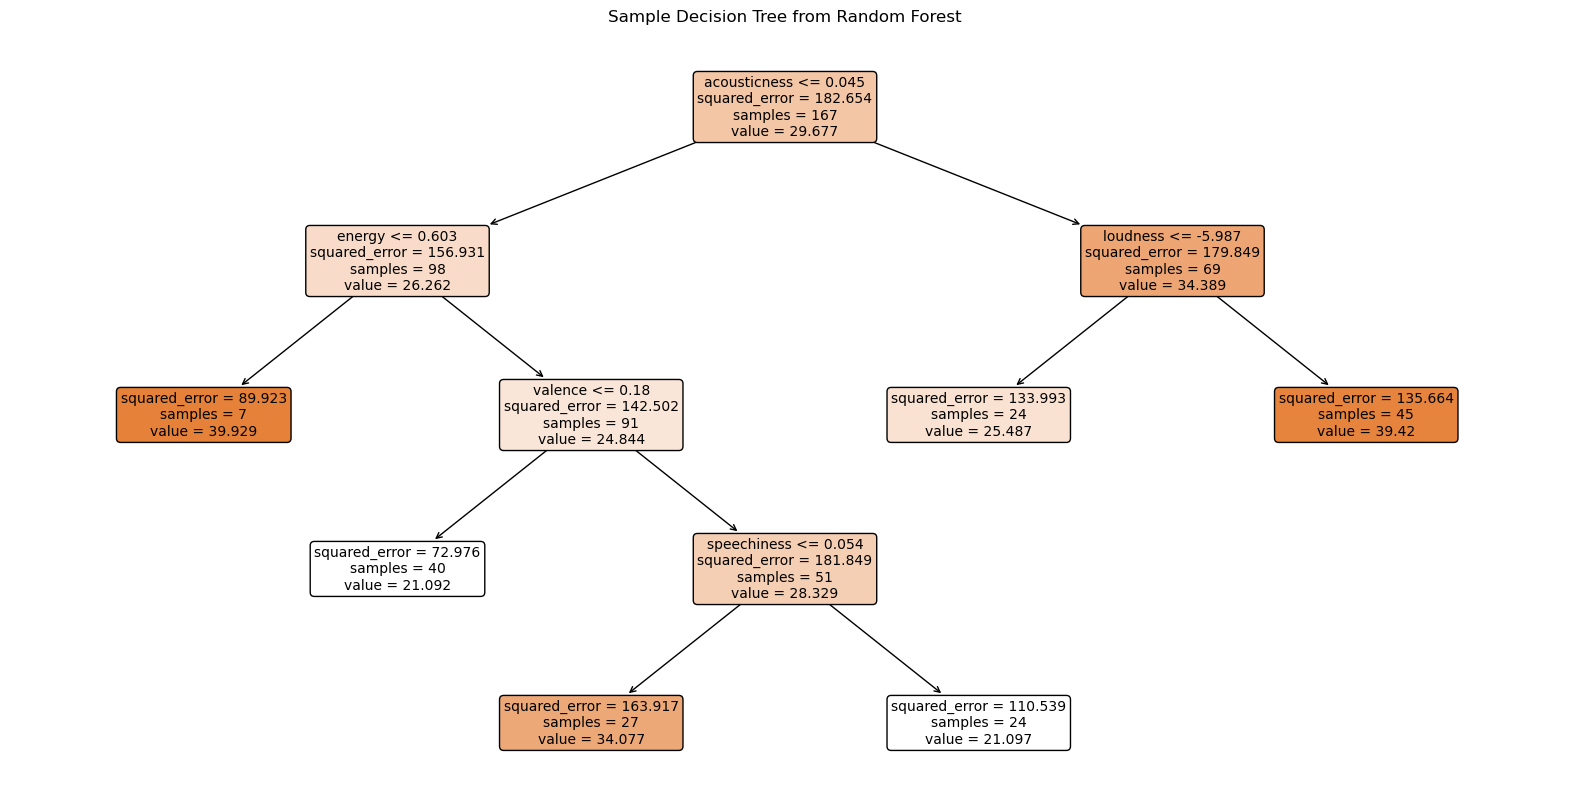

In [98]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = rfModel.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=randomforest_df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Sample Decision Tree from Random Forest")
plt.show()


# Image Analytics

## Data Cleaning

In [101]:
coverdata_df =pandas.read_csv("covers_result.csv")
coverdata_df.head(5)

,Index,filenames,labels,confidencescores
0,0,10 Years of Seven Lions.jpg,Logo,98.433891
1,1,ASCEND (Remixes).jpg,Dancing,99.874458
2,2,ASCEND (Remixes).jpg,Leisure Activities,99.874458
3,3,ASCEND (Remixes).jpg,Person,99.874458
4,4,ASCEND.jpg,Dancing,97.247765


In [106]:
coverdata_df['filenames'].value_counts().sort_index()

10 Years of Seven Lions.jpg            1
ASCEND (Remixes).jpg                   3
ASCEND.jpg                             6
Alive.jpg                              2
Ashes (Remixes).jpg                    5
Ashes.jpg                             11
Awake (Remixes).jpg                    4
Awake.jpg                              5
Between Broken (Remixes).jpg           7
Between Broken.jpg                    11
Beyond The Veil (Remixes).jpg          5
Beyond The Veil.jpg                    1
Bloodless.jpg                          9
Creation.jpg                           8
Find Another Way (Remixes).jpg         5
Gravity (Deluxe).jpg                  10
Gravity.jpg                            6
North Star.jpg                         3
PULSE.jpg                              6
Seven Lions on Anjunabeats.jpg        10
The Throes Of Winter (Remixes).jpg     5
Two Hearts.jpg                         5
Where I Won't Be Found.jpg             5
Wild Youth (The Remixes).jpg           8
Wild Youth.jpg  

In [108]:
songs_df['album'].value_counts()

ILLENIUM - Remixes                45
ASCEND (Remixes)                  24
Wild Youth (The Remixes)          17
ASCEND                            17
Alive                             16
Gravity                           16
ILLENIUM                          16
Fallen Embers (Remixes)           16
Ashes (Remixes)                   15
Awake (Remixes)                   15
Seven Lions on Anjunabeats        14
Fallen Embers                     14
North Star                        14
Between Broken (Remixes)          14
PULSE                             14
Awake                             13
Between Broken                    13
Ashes                             12
Beyond The Veil                   12
Beyond The Veil (Remixes)         11
Two Hearts                        11
10 Years of Seven Lions           11
Find Another Way (Remixes)        10
Wild Youth                        10
Where I Won't Be Found             8
Opus                               8
Bloodless                          8
C

In [110]:
# Combining dataframes

coverdata_df.rename(columns={'filenames':'album'},inplace=True)
coverdata_df

,Index,album,labels,confidencescores
0,0,10 Years of Seven Lions.jpg,Logo,98.433891
1,1,ASCEND (Remixes).jpg,Dancing,99.874458
2,2,ASCEND (Remixes).jpg,Leisure Activities,99.874458
3,3,ASCEND (Remixes).jpg,Person,99.874458
4,4,ASCEND.jpg,Dancing,97.247765
...,...,...,...,...
140,140,Wild Youth (The Remixes).jpg,Painting,90.728989
141,141,Wild Youth.jpg,Book,99.992874
142,142,Wild Youth.jpg,Comics,99.992874
143,143,Wild Youth.jpg,Publication,99.992874


In [115]:
coverdata_df.dtypes

Index                 int64
album                object
labels               object
confidencescores    float64
dtype: object

In [116]:
songs_df.dtypes

artist               object
album                object
track_number          int64
id                   object
name                 object
uri                  object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity            int64
dtype: object

In [117]:
# Convert to string for data manipulation
coverdata_df['album'] = coverdata_df['album'].astype('category')
songs_df['album'] = songs_df['album'].astype('category')

In [121]:
coverdata_df

,Index,album,labels,confidencescores
0,0,10 Years of Seven Lions.jpg,Logo,98.433891
1,1,ASCEND (Remixes).jpg,Dancing,99.874458
2,2,ASCEND (Remixes).jpg,Leisure Activities,99.874458
3,3,ASCEND (Remixes).jpg,Person,99.874458
4,4,ASCEND.jpg,Dancing,97.247765
...,...,...,...,...
140,140,Wild Youth (The Remixes).jpg,Painting,90.728989
141,141,Wild Youth.jpg,Book,99.992874
142,142,Wild Youth.jpg,Comics,99.992874
143,143,Wild Youth.jpg,Publication,99.992874


In [123]:
# Remove .jpg string

coverdata_df['album'] = coverdata_df['album'].str.rstrip('.jpg')

coverdata_df

,Index,album,labels,confidencescores
0,0,10 Years of Seven Lions,Logo,98.433891
1,1,ASCEND (Remixes),Dancing,99.874458
2,2,ASCEND (Remixes),Leisure Activities,99.874458
3,3,ASCEND (Remixes),Person,99.874458
4,4,ASCEND,Dancing,97.247765
...,...,...,...,...
140,140,Wild Youth (The Remixes),Painting,90.728989
141,141,Wild Youth,Book,99.992874
142,142,Wild Youth,Comics,99.992874
143,143,Wild Youth,Publication,99.992874


In [124]:
# Merge

merged_df = pd.merge(coverdata_df, songs_df, on='album', how='outer')

merged_df.to_csv('merged_data.csv', index=False)

In [126]:
# Data cleaning - Remove any without Rekognition tags

print("Initial: ", merged_df.shape)

merged_df = merged_df.dropna(subset='labels')

print("After: ", merged_df.shape)

Initial:  (1886, 19)
After:  (1773, 19)


## Album Cover Analysis by Artists

In [134]:
merged_df.shape

(1773, 19)

In [143]:
# Before we continue, we want to make sure that all the labels have high confidence scores. 
# To do this, we will check the descriptive analytics of the confidence scores and review its min and max. 
# Unless there's any below 80%, it should be okay. 

merged_df['confidencescores'].describe()

count    1773.000000
mean       97.310599
std         2.757653
min        90.267899
25%        95.510933
50%        98.321404
75%        99.877983
max       100.000000
Name: confidencescores, dtype: float64

In [131]:
merged_df['artist'].value_counts()

dabin          544
illenium       506
seven_lions    399
gryffin        282
sabai           42
Name: artist, dtype: int64

In [138]:
# Filter for dabin

dabin_df = merged_df[merged_df['artist']=='dabin']

dabin_df.shape

(544, 19)

In [139]:
dabin_df

,Index,album,labels,confidencescores,artist,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
549,37.0,Between Broken (Remixes),Concert,100.000000,dabin,1,7MInq6wTZhanXT4O9W4469,Smoke Signals - Dabin & Skybreak VIP Remix,spotify:track:7MInq6wTZhanXT4O9W4469,0.000778,0.587,0.931,0.000244,0.1040,-3.405,0.0741,140.085,0.242,21
550,37.0,Between Broken (Remixes),Concert,100.000000,dabin,2,22Ja9pQO5Oam6bvAqkukjM,Again - Dabin & MYRNE VIP Remix,spotify:track:22Ja9pQO5Oam6bvAqkukjM,0.005500,0.735,0.700,0.006580,0.2300,-5.585,0.0347,126.009,0.147,18
551,37.0,Between Broken (Remixes),Concert,100.000000,dabin,3,3L61zbyjPTQ1bflfxseOxY,When This Is Over - WODD Remix,spotify:track:3L61zbyjPTQ1bflfxseOxY,0.047400,0.651,0.929,0.000086,0.2110,-2.140,0.0672,130.057,0.341,16
552,37.0,Between Broken (Remixes),Concert,100.000000,dabin,5,4LFnSFQHWhlg31jHXJoWJl,Starbright - Elephante Remix,spotify:track:4LFnSFQHWhlg31jHXJoWJl,0.123000,0.426,0.872,0.003160,0.0972,-4.562,0.0679,160.025,0.346,28
553,37.0,Between Broken (Remixes),Concert,100.000000,dabin,6,6mVL5Kyb4u02byJWGYQfSa,Starbright - Chime Remix,spotify:track:6mVL5Kyb4u02byJWGYQfSa,0.079000,0.587,0.662,0.000011,0.1610,-4.649,0.0575,86.988,0.318,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,144.0,Wild Youth,Person,96.447304,dabin,6,7D8E1SkxXuUQBBBGJyIbBg,Altitude,spotify:track:7D8E1SkxXuUQBBBGJyIbBg,0.006300,0.434,0.699,0.018500,0.1150,-8.020,0.0422,145.022,0.136,28
1769,144.0,Wild Youth,Person,96.447304,dabin,7,4cMvJ0Wh8Rnm46QuTlFVMc,In Flames,spotify:track:4cMvJ0Wh8Rnm46QuTlFVMc,0.008410,0.480,0.730,0.000000,0.1030,-4.352,0.0366,91.988,0.295,44
1770,144.0,Wild Youth,Person,96.447304,dabin,8,7GiVpctaguQibGEYTShcX8,Home,spotify:track:7GiVpctaguQibGEYTShcX8,0.002790,0.403,0.658,0.000032,0.1490,-4.987,0.0429,179.908,0.161,32
1771,144.0,Wild Youth,Person,96.447304,dabin,9,0bey95Gcplo3PsvEubZjv1,Bloom,spotify:track:0bey95Gcplo3PsvEubZjv1,0.227000,0.599,0.565,0.000043,0.0984,-6.304,0.0265,134.125,0.142,46


In [140]:
dabin_df['labels'].value_counts()

Person          56
Art             30
Painting        30
Graphics        30
Night           19
Nature          19
Outdoors        19
Fruit           17
Pineapple       17
Food            17
Plant           17
Produce         17
Crowd           14
Concert         14
Urban           14
Rock Concert    14
Stage           14
Lighting        14
Woman           13
Girl            13
Female          13
Adult           13
Pattern         13
Modern Art      13
Child           13
Purple          11
Comics          10
Book            10
Publication     10
Photography      8
Scenery          8
Shelter          8
Building         8
Architecture     8
Name: labels, dtype: int64

### Word Clouds

In [144]:
!pip install wordcloud matplotlib
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


     -------------------------------------- 300.6/300.6 kB 6.3 MB/s eta 0:00:00



 
 Word Cloud for Dabin 
 
 


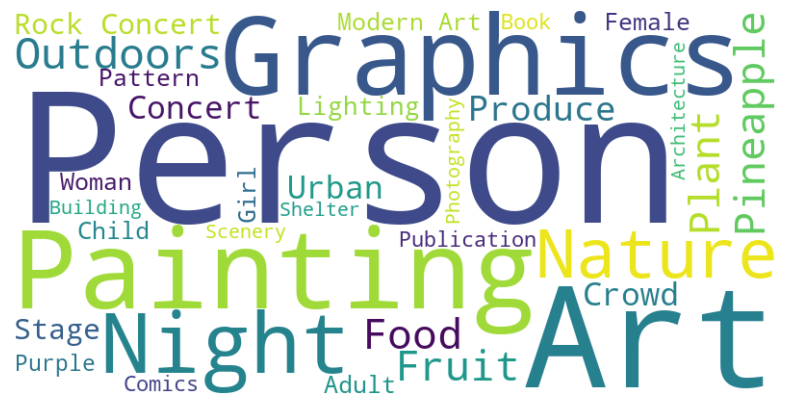

In [149]:
# Convert value_counts to a dictionary
word_freq = dabin_df['labels'].value_counts().to_dict()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud using matplotlib
print("\n \n Word Cloud for Dabin \n \n ")

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()

Purple        14
Plant         14
Vegetation    14
Name: labels, dtype: int64
 
 
 Word Cloud for sabai 
 
 


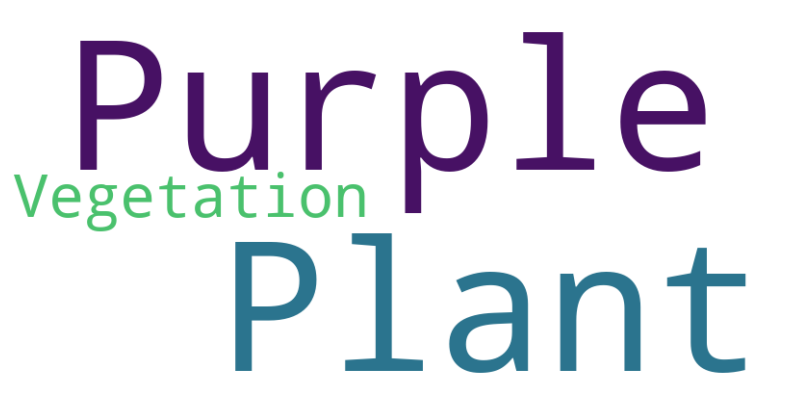

In [153]:
artist = 'sabai'

df = merged_df[merged_df['artist']==artist]

print(df['labels'].value_counts())

# Convert value_counts to a dictionary
word_freq = df['labels'].value_counts().to_dict()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud using matplotlib
print(f" \n \n Word Cloud for {artist} \n \n ")

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()


Person                96
Advertisement         43
Dancing               41
Leisure Activities    41
Poster                28
Book                  27
Publication           27
Outdoors              27
Adult                 17
Female                17
Woman                 17
Nuclear               15
Flare                 13
Light                 13
Sun                   12
Sunlight              12
Scenery               12
Silhouette            12
Sunrise               12
Sky                   12
Nature                12
Name: labels, dtype: int64
 
 
 Word Cloud for illenium 
 
 


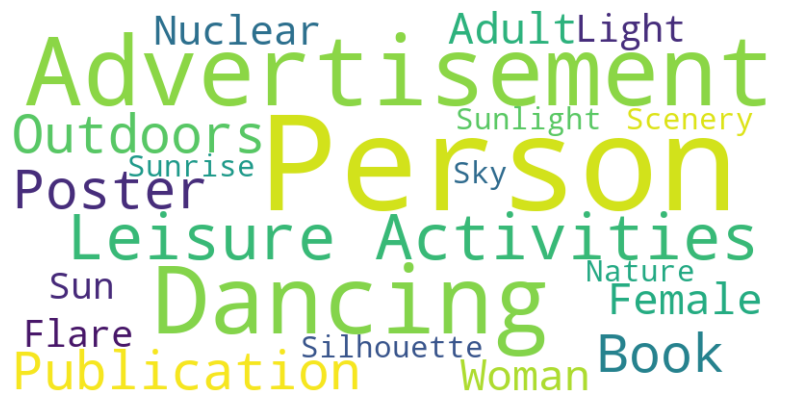

In [154]:
artist = 'illenium'

df = merged_df[merged_df['artist']==artist]

print(df['labels'].value_counts())

# Convert value_counts to a dictionary
word_freq = df['labels'].value_counts().to_dict()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud using matplotlib
print(f" \n \n Word Cloud for {artist} \n \n ")

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()


Light             37
Outdoors          30
Night             30
Nature            30
Flare             21
Logo              16
Astronomy         16
Wheel             16
Machine           16
Sky               14
Poster             7
Vehicle            7
Transportation     7
Car                7
Lighting           7
Publication        7
Book               7
Advertisement      7
Name: labels, dtype: int64
 
 
 Word Cloud for gryffin 
 
 


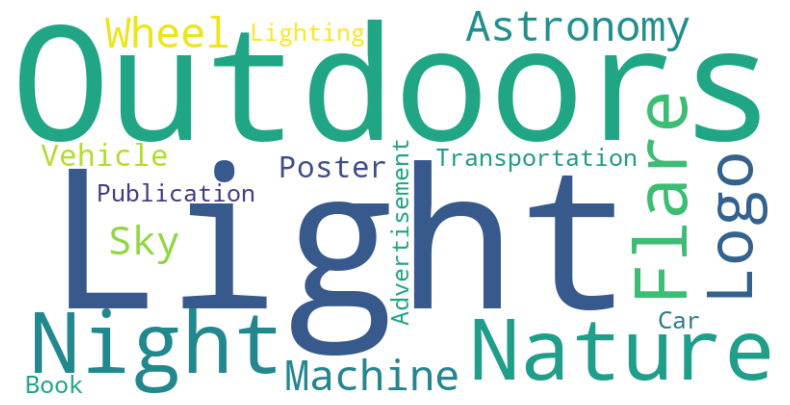

In [155]:
artist = 'gryffin'

df = merged_df[merged_df['artist']==artist]

print(df['labels'].value_counts())

# Convert value_counts to a dictionary
word_freq = df['labels'].value_counts().to_dict()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud using matplotlib
print(f" \n \n Word Cloud for {artist} \n \n ")

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()


Nature           32
Outdoors         32
Publication      24
Book             24
Logo             23
Plant            18
Vegetation       18
Sky              17
Scenery          15
Advertisement    15
Male             14
Face             14
Portrait         14
Photography      14
Head             14
Adult            14
Man              14
Person           14
Graphics         11
Art              11
Painting         11
Water             8
Landscape         7
Ice               7
Mountain          7
Poster            7
Name: labels, dtype: int64
 
 
 Word Cloud for seven_lions 
 
 


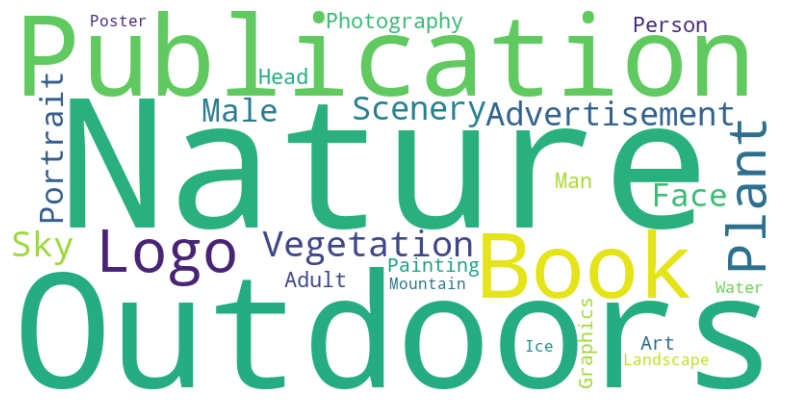

In [156]:
artist = 'seven_lions'

df = merged_df[merged_df['artist']==artist]

print(df['labels'].value_counts())

# Convert value_counts to a dictionary
word_freq = df['labels'].value_counts().to_dict()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud using matplotlib
print(f" \n \n Word Cloud for {artist} \n \n ")

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()


In [157]:
merged_df['labels'].value_counts()

Person            166
Outdoors          108
Nature             93
Book               68
Publication        68
                 ... 
Ice                 7
Mountain            7
Landscape           7
Car                 7
Transportation      7
Name: labels, Length: 63, dtype: int64

### Label Chart

In [158]:
merged_df['artist'].value_counts()

dabin          544
illenium       506
seven_lions    399
gryffin        282
sabai           42
Name: artist, dtype: int64

In [208]:
artist = 'dabin'

dabin_df = merged_df[merged_df['artist']==artist]
labels_df = dabin_df['labels'].value_counts().index
labels_df = list(labels_df)
labels_df

# Create a new DataFrame with labels_df as a column
new_df = pd.DataFrame(labels_df, columns=['labels'])

# Add a new column for the artist
new_df['artist'] = artist

In [209]:
new_df

,labels,artist
0,Person,dabin
1,Art,dabin
2,Painting,dabin
3,Graphics,dabin
4,Night,dabin
5,Nature,dabin
6,Outdoors,dabin
7,Fruit,dabin
8,Pineapple,dabin
9,Food,dabin


In [210]:
artist = 'illenium'

dabin_df = merged_df[merged_df['artist']==artist]
labels_df = dabin_df['labels'].value_counts().index
labels_df = list(labels_df)
labels_df

# Assuming new_df is the DataFrame containing your labels and artist
new_rows = pd.DataFrame(labels_df, columns=['labels'])
new_rows['artist'] = artist  # Adding the artist column temporarily

# Assuming existing_df is your pre-existing DataFrame
# Concatenate the existing DataFrame with the new rows
new_df = pd.concat([new_df, new_rows], ignore_index=True)

In [211]:
artist = 'sabai'

dabin_df = merged_df[merged_df['artist']==artist]
labels_df = dabin_df['labels'].value_counts().index
labels_df = list(labels_df)
labels_df

# Assuming new_df is the DataFrame containing your labels and artist
new_rows = pd.DataFrame(labels_df, columns=['labels'])
new_rows['artist'] = artist  # Adding the artist column temporarily

# Assuming existing_df is your pre-existing DataFrame
# Concatenate the existing DataFrame with the new rows
new_df = pd.concat([new_df, new_rows], ignore_index=True)

In [212]:
artist = 'seven_lions'

dabin_df = merged_df[merged_df['artist']==artist]
labels_df = dabin_df['labels'].value_counts().index
labels_df = list(labels_df)
labels_df

# Assuming new_df is the DataFrame containing your labels and artist
new_rows = pd.DataFrame(labels_df, columns=['labels'])
new_rows['artist'] = artist  # Adding the artist column temporarily

# Assuming existing_df is your pre-existing DataFrame
# Concatenate the existing DataFrame with the new rows
new_df = pd.concat([new_df, new_rows], ignore_index=True)

In [213]:
artist = 'gryffin'

dabin_df = merged_df[merged_df['artist']==artist]
labels_df = dabin_df['labels'].value_counts().index
labels_df = list(labels_df)
labels_df

# Assuming new_df is the DataFrame containing your labels and artist
new_rows = pd.DataFrame(labels_df, columns=['labels'])
new_rows['artist'] = artist  # Adding the artist column temporarily

# Assuming existing_df is your pre-existing DataFrame
# Concatenate the existing DataFrame with the new rows
new_df = pd.concat([new_df, new_rows], ignore_index=True)

In [215]:
new_df.to_csv('new_df.csv', index=False)


In [5]:
import pandas as pd 

df = pd.read_csv('new_df.csv')

# Create a dictionary to store the lists of unique artists for each label
label_artists_dict = {}

# Iterate through the DataFrame
for index, row in df.iterrows():
    label = row['labels']
    artist = row['artist']
    
    # If the label is not already in the dictionary, add it with an empty set
    if label not in label_artists_dict:
        label_artists_dict[label] = set()  # Using set to avoid duplicates
    
    # Add the artist to the corresponding label set
    label_artists_dict[label].add(artist)

# Convert sets back to lists
label_artists_dict = {label: list(artists) for label, artists in label_artists_dict.items()}

# Print the result
print(label_artists_dict)

{'Person': ['dabin', 'seven_lions', 'illenium'], 'Art': ['dabin', 'seven_lions'], 'Painting': ['dabin', 'seven_lions'], 'Graphics': ['dabin', 'seven_lions'], 'Night': ['dabin', 'gryffin'], 'Nature': ['dabin', 'seven_lions', 'gryffin', 'illenium'], 'Outdoors': ['dabin', 'seven_lions', 'gryffin', 'illenium'], 'Fruit': ['dabin'], 'Pineapple': ['dabin'], 'Food': ['dabin'], 'Plant': ['dabin', 'seven_lions', 'sabai'], 'Produce': ['dabin'], 'Crowd': ['dabin'], 'Concert': ['dabin'], 'Urban': ['dabin'], 'Rock Concert': ['dabin'], 'Stage': ['dabin'], 'Lighting': ['dabin', 'gryffin'], 'Woman': ['dabin', 'illenium'], 'Girl': ['dabin'], 'Female': ['dabin', 'illenium'], 'Adult': ['dabin', 'seven_lions', 'illenium'], 'Pattern': ['dabin'], 'Modern Art': ['dabin'], 'Child': ['dabin'], 'Purple': ['dabin', 'sabai'], 'Comics': ['dabin'], 'Book': ['dabin', 'seven_lions', 'gryffin', 'illenium'], 'Publication': ['dabin', 'seven_lions', 'gryffin', 'illenium'], 'Photography': ['dabin', 'seven_lions'], 'Scenery

In [18]:
label_artists_dict

{'Person': ['dabin', 'seven_lions', 'illenium'],
 'Art': ['dabin', 'seven_lions'],
 'Painting': ['dabin', 'seven_lions'],
 'Graphics': ['dabin', 'seven_lions'],
 'Night': ['dabin', 'gryffin'],
 'Nature': ['dabin', 'seven_lions', 'gryffin', 'illenium'],
 'Outdoors': ['dabin', 'seven_lions', 'gryffin', 'illenium'],
 'Fruit': ['dabin'],
 'Pineapple': ['dabin'],
 'Food': ['dabin'],
 'Plant': ['dabin', 'seven_lions', 'sabai'],
 'Produce': ['dabin'],
 'Crowd': ['dabin'],
 'Concert': ['dabin'],
 'Urban': ['dabin'],
 'Rock Concert': ['dabin'],
 'Stage': ['dabin'],
 'Lighting': ['dabin', 'gryffin'],
 'Woman': ['dabin', 'illenium'],
 'Girl': ['dabin'],
 'Female': ['dabin', 'illenium'],
 'Adult': ['dabin', 'seven_lions', 'illenium'],
 'Pattern': ['dabin'],
 'Modern Art': ['dabin'],
 'Child': ['dabin'],
 'Purple': ['dabin', 'sabai'],
 'Comics': ['dabin'],
 'Book': ['dabin', 'seven_lions', 'gryffin', 'illenium'],
 'Publication': ['dabin', 'seven_lions', 'gryffin', 'illenium'],
 'Photography': ['dab

In [28]:
# Isolate labels by how common they are 

print('Sorted Labels for cover art \n\n\n')

print('Labels with four artists \n')
for key in label_artists_dict:
    if len(label_artists_dict[key]) >= 4:
        print(f"{key}: {label_artists_dict[key]}")

print('\n\nLabels with three artists \n')    
for key in label_artists_dict:
    if len(label_artists_dict[key]) ==3:
        print(f"{key}: {label_artists_dict[key]}")
        
print('\n\nLabels with two artists \n')
for key in label_artists_dict:
    if len(label_artists_dict[key]) ==2:
        print(f"{key}: {label_artists_dict[key]}")

print('\n\nUnique labels \n')
for key in label_artists_dict:
    if len(label_artists_dict[key]) ==1:
        print(f"{key}: {label_artists_dict[key]}")

Sorted Labels for cover art 



Labels with four artists 

Nature: ['dabin', 'seven_lions', 'gryffin', 'illenium']
Outdoors: ['dabin', 'seven_lions', 'gryffin', 'illenium']
Book: ['dabin', 'seven_lions', 'gryffin', 'illenium']
Publication: ['dabin', 'seven_lions', 'gryffin', 'illenium']


Labels with three artists 

Person: ['dabin', 'seven_lions', 'illenium']
Plant: ['dabin', 'seven_lions', 'sabai']
Adult: ['dabin', 'seven_lions', 'illenium']
Scenery: ['dabin', 'seven_lions', 'illenium']
Advertisement: ['seven_lions', 'gryffin', 'illenium']
Poster: ['seven_lions', 'gryffin', 'illenium']
Sky: ['seven_lions', 'gryffin', 'illenium']


Labels with two artists 

Art: ['dabin', 'seven_lions']
Painting: ['dabin', 'seven_lions']
Graphics: ['dabin', 'seven_lions']
Night: ['dabin', 'gryffin']
Lighting: ['dabin', 'gryffin']
Woman: ['dabin', 'illenium']
Female: ['dabin', 'illenium']
Purple: ['dabin', 'sabai']
Photography: ['dabin', 'seven_lions']
Flare: ['gryffin', 'illenium']
Light: ['gryffin', 

## Image Analytics with Popularity

In [21]:
import pandas as pd

df = pd.read_csv('merged_data.csv')
df.columns

Index(['Index', 'album', 'labels', 'confidencescores', 'artist',
       'track_number', 'id', 'name', 'uri', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity'],
      dtype='object')

In [22]:
# Data Cleaning

# Drop Unnecessary columns

df = df.drop(columns=['Index','confidencescores','track_number','uri','name','acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence'])
df = df.dropna()
df['album'] = df['album'].str.replace(' ', '_')

In [23]:
df.columns

Index(['album', 'labels', 'artist', 'id', 'popularity'], dtype='object')

In [24]:
from sklearn.model_selection import train_test_split

to_drop = ['album','artist','id','popularity'] # Isolate only the labels and outcome 

predictors = df.drop(columns=to_drop).columns
outcome = 'popularity'

X = pd.get_dummies(df[predictors], drop_first=True, dtype=int)
y = df[outcome]


# split into training and validation
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4,
                                                      random_state=1)

In [25]:
# Using Random Forest 

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# use grid search to find optimized tree
param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
    'min_samples_split': [10, 20, 30, 40, 50],
}
gridSearch = GridSearchCV(RandomForestRegressor(), param_grid, cv=10, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)




Initial parameters:  {'max_depth': 25, 'min_impurity_decrease': 0.01, 'min_samples_split': 20}


In [26]:
# Train a random forest Regressor using the training set
rfModel = RandomForestRegressor(max_depth = 25, min_impurity_decrease = 0.01, min_samples_split=20, random_state=1)
rfModel.fit(train_X, train_y)

# Make predictions on the validation set
valid_predictions = rfModel.predict(valid_X)

# Making predictions on the same data or new data
predictions = rfModel.predict(valid_X)


# Get feature importances
importances = rfModel.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

feature_importance_df.to_csv('feature_imp.csv', index=False)

# Calculate performance metrics
mae = mean_absolute_error(valid_y, predictions)
mse = mean_squared_error(valid_y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(valid_y, predictions)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R²: {r2:.2f}')


                  Feature  Importance
23           labels_Light    0.087131
3        labels_Astronomy    0.075172
13          labels_Female    0.063268
26         labels_Machine    0.057104
60           labels_Wheel    0.052733
..                    ...         ...
33         labels_Nuclear    0.000245
21       labels_Landscape    0.000179
55  labels_Transportation    0.000161
10           labels_Crowd    0.000129
30        labels_Mountain    0.000000

[62 rows x 2 columns]
Mean Absolute Error: 10.16
Mean Squared Error: 146.57
Root Mean Squared Error: 12.11
R²: 0.18


In [30]:
feature_importance_df.head(10)

,Feature,Importance
23,labels_Light,0.087131
3,labels_Astronomy,0.075172
13,labels_Female,0.063268
26,labels_Machine,0.057104
60,labels_Wheel,0.052733
61,labels_Woman,0.045860
49,labels_Silhouette,0.042596
14,labels_Flare,0.040958
52,labels_Sun,0.039706
32,labels_Night,0.027624


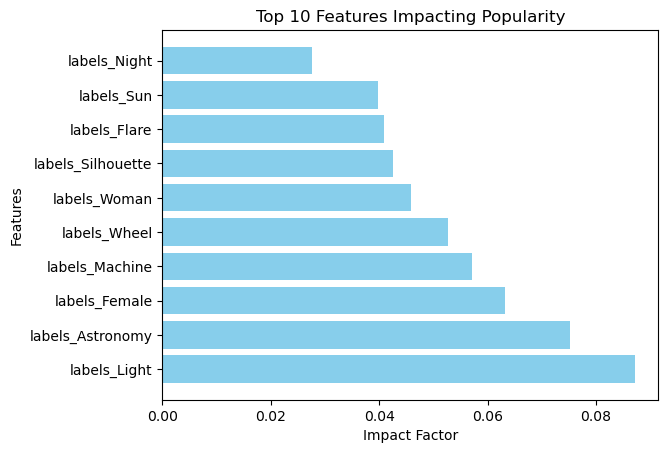

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume feature_importance_df is a Pandas DataFrame containing your feature importance data
# Sort the DataFrame by 'Importance' in descending order
sorted_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a figure and axes
fig, ax = plt.subplots()

# Create horizontal bar chart for the top 5 features using the axes
ax.barh(sorted_df['Feature'].head(10), sorted_df['Importance'].head(10), color='skyblue')

# Add title and labels
ax.set_title('Top 10 Features Impacting Popularity')
ax.set_xlabel('Impact Factor')
ax.set_ylabel('Features')

# Show the plot
plt.show()
